# Machine Learning-Based Classification of Lung Cancer Subtypes Using K-means Clustering algorithm 

Lung cancer is one of the leading causes of cancer-related deaths worldwide, with adenocarcinoma (AD) and squamous cell carcinoma (SCC) being two major subtypes. Accurate classification of these subtypes is crucial for proper diagnosis and treatment. This study employs an unsupervised machine learning approach, specifically K-means clustering, to classify lung cancer samples into AD and SCC subtypes based on their gene expression profiles.
We utilize a publicly available dataset from the Gene Expression Omnibus (GEO) with the accession number GSE10245. This dataset contains gene expression data from lung cancer patients, with samples labeled as either AD or SCC. Our analysis aims to demonstrate the potential of unsupervised learning techniques in distinguishing between these two lung cancer subtypes without prior knowledge of the sample labels.
The workflow involves data preprocessing, K-means clustering, and evaluation of the clustering results against the known sample labels. We perform this analysis on the entire dataset and also demonstrate a train-test split approach to assess the model's generalization capability.

## Learnings and Challenges
### **Laurel (Xingxian) Li**

**Q: What was your biggest challenge in this project? (regarding writing code and not only)**

A: The biggest challenge for me in this project was understanding how K-means works and how we should perform clustering. At first, I was very worried because the result was different each time. Now I realize that this is because the initial positions of the clusters are chosen randomly.

**Q: What did you learn while working on this project? (regarding writing code and not only)**

A: I learned some basic machine learning algorithms like K-means. I also implemented other algorithms and tried them to learn what we should use in different contexts.

**Q: If you had more time on the project, what other question(s) would you like to answer?**

A: If I had more time on the project, I would want to answer: If the initial dataset has more outliers, do other clustering methods still work?

### **Gouri Anil**

**Q: What was your biggest challenge in this project? (regarding writing code and not only)**

A: The biggest challenges in this project were:
- Properly handling and preprocessing the GEO dataset, as gene expression data often requires careful normalization and cleaning
- Implementing the train-test split while maintaining balanced classes (20 AD and 9 SCC samples) to ensure unbiased model evaluation
- Managing the high dimensionality of gene expression data while ensuring the K-means clustering remained computationally efficient
- Mapping cluster assignments to biological labels (AD/SCC) in a way that maximizes accuracy, as K-means produces arbitrary cluster numbers

**Q: What did you learn while working on this project? (regarding writing code and not only)**

A: Key learnings from this project include:
- How to work with biological data using GEOparse and handle complex genomic datasets
- The effectiveness of unsupervised learning in capturing biological patterns without prior knowledge
- The importance of proper data splitting and validation in bioinformatics applications
- How to evaluate clustering results against known labels in a meaningful way
- The relationship between visual separation in PCA plots and model performance

**Q: If you had more time on the project, what other questions would you like to answer?**

A: Additional questions to explore:
- Can we identify the specific genes that contribute most to the separation between AD and SCC?
- How would other clustering algorithms (like hierarchical clustering or DBSCAN) compare to K-means for this dataset?
- Could we integrate clinical data with gene expression data to improve classification accuracy?
- What is the biological significance of the genes that show the most variation between clusters?
- How does this clustering approach perform on other lung cancer subtypes or different cancer types?

### **Natalie Oliven**

**Q: What was your biggest challenge in this project? (regarding writing code and not only)**

A: My biggest challenge in this project was plotting.  I did not have enough background to be able to make highly specified plots, and when I used generative AI to assist, its solutions were incredibly difficult to read through and usually very incorrect. So that part took a lot of time and revisions.

**Q: What did you learn while working on this project? (regarding writing code and not only)**

A: While working on this project, I was surprised to learn that the number of subtypes of AD and SCC that I predicted were actually close to the true value.  This made me interested in the mechanisms behind typing cancers, and I am looking forward to reading the paper that I referenced in more detail, to see if the methods they used for typing by gene expression are similar to my own.  The paper "Lung Adenocarcinoma and Squamous Cell Carcinoma Gene Expression Subtypes Demonstrate Significant Differences in Tumor Immune Landscape" by Faruki et al. states that "The three gene expression AD subtypes include terminal respiratory unit (TRU), proximal proliferative (PP), and proximal Inflammatory (PI), which were formerly referred to as the bronchioid, magnoid, and squamoid subtypes, respectively.  SCC includes four subtypes: primitive, classical, basal, and secretory."  These 7 types are close to the number I predicted


**Q: If you had more time on the project, what other question(s) would you like to answer?**

A: If I had more time, a main feature I would like to implement is to run this same clustering code on the data directly from the paper mentioned above, and to try to figure out which of the predicted subtypes match which clusters in my data by using paper data to train and our dataset to test subtyping, and quantify how well these 7 subtypes match with the original clusters that I created "blindly" without this reference through this project.

A feature that I would implement if I had more time is to create an iterative version of this process. Right now, my code is able to evaluate which k value for k means clustering gies the highest accuracy rate over multiple test runs and evaluate the accuracy of each cluster once the number of clusters has been decided on. By fixing k to be a value that provides a high overall accuracy in the test set (values between 5 and 8, inclusive), I can examine the accuracy of each cluster under different random states, to determine if there is any interesting behavior in the clusters that are the "weakest link". Biologically, these are cells that are similar to each other but difficult to assign to an AD/SCC type. If I could isolate cells from these clusters and compare them to the data from other studies that have AD/SCC subtypes listed for their data as a ground truth (this one does not). I could also try to improve the performance of the worst-performing clusters with heirarchical clustering, which would allow the clustering algoritm to iteratively focus more on the cells that perform less well in typing.

Another thing I could do, not related to these "weakest-link" cells, is to improve on my plotting code, which still has some minor errors (particularly the accuracy fit function, which plots some, but not all of the values), and to improve the normalization code, which should substantially improved prior to k means but might not. I cannot tell if this issue is due to my plot not representing the improvements, or an issue with the normalization itself not creating a better fit.

# Declaration of AI Usage
Artificial intelligence tools were utilized in this project to assist with code development and the creation of data visualizations. These AI-powered resources contributed to enhancing the efficiency and quality of both the programming and graphical elements of the work

# Step 1: Import Libraries and Load Data
This section imports necessary libraries and loads the Gene Expression Omnibus (GEO) dataset using the GEOparse library.
This line uses the GEOparse library to download and parse the Gene Expression Omnibus (GEO) dataset with the accession number GSE10245. 
GEO is a public repository for high-throughput gene expression data. The get_GEO function retrieves the dataset and stores it in the current directory ("./"). 
The resulting gse object contains all the information about the dataset, including sample metadata and expression data.

This section imports the necessary Python libraries:

* GEOparse: Used to download and parse Gene Expression Omnibus (GEO) datasets.
* pandas: For data manipulation and analysis.
* sklearn.cluster.KMeans: Implements K-means clustering algorithm.
* sklearn.metrics.accuracy_score: To calculate the accuracy of our predictions.
* matplotlib.pyplot: For creating plots and visualizations.
* numpy: For numerical operations on arrays.

In [1]:
!pip install GEOparse

In [3]:
import GEOparse
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the data from GEO with GEOparse using the accession number
gse = GEOparse.get_GEO(geo="GSE10245", destdir="./")

12-Dec-2024 12:50:26 DEBUG utils - Directory ./ already exists. Skipping.
12-Dec-2024 12:50:26 INFO GEOparse - File already exist: using local version.
12-Dec-2024 12:50:26 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
12-Dec-2024 12:50:26 DEBUG GEOparse - DATABASE: GeoMiame
12-Dec-2024 12:50:26 DEBUG GEOparse - SERIES: GSE10245
12-Dec-2024 12:50:26 DEBUG GEOparse - PLATFORM: GPL570
12-Dec-2024 12:50:30 DEBUG GEOparse - SAMPLE: GSM258551
12-Dec-2024 12:50:30 DEBUG GEOparse - SAMPLE: GSM258552
12-Dec-2024 12:50:30 DEBUG GEOparse - SAMPLE: GSM258553
12-Dec-2024 12:50:30 DEBUG GEOparse - SAMPLE: GSM258554
12-Dec-2024 12:50:31 DEBUG GEOparse - SAMPLE: GSM258555
12-Dec-2024 12:50:31 DEBUG GEOparse - SAMPLE: GSM258556
12-Dec-2024 12:50:31 DEBUG GEOparse - SAMPLE: GSM258557
12-Dec-2024 12:50:32 DEBUG GEOparse - SAMPLE: GSM258558
12-Dec-2024 12:50:32 DEBUG GEOparse - SAMPLE: GSM258559
12-Dec-2024 12:50:32 DEBUG GEOparse - SAMPLE: GSM258560
12-Dec-2024 12:50:33 DEBUG GEOparse - SAMPLE: GS

This loop iterates through each sample (GSM) in the dataset. For each sample:
* 'gsm.table['VALUE'].values' extracts the expression values and appends them to expression_data.
* The sample's label is extracted from the metadata. It's split at the colon and the second part is taken.
* The label is simplified to 'AD' for adenocarcinoma and 'SCC' for squamous cell carcinoma.

This preprocessing step prepares the data for analysis by organizing it into a list of expression values and corresponding labels.

In [5]:
# Extract data from GEO dataset
# Retrieve the gene expression data from samples

expression_data = []
labels = []
for gsm_name, gsm in gse.gsms.items():
    expression_data.append(gsm.table['VALUE'].values)
    label = gsm.metadata['characteristics_ch1'][0].split(": ")[1]
    labels.append('AD' if 'adenocarcinoma' in label.lower() else 'SCC')
    
    
gse.gsms.items()
#gsm_name represents the sample name and the gse represents the sample id

dict_items([('GSM258551', <SAMPLE: GSM258551>), ('GSM258552', <SAMPLE: GSM258552>), ('GSM258553', <SAMPLE: GSM258553>), ('GSM258554', <SAMPLE: GSM258554>), ('GSM258555', <SAMPLE: GSM258555>), ('GSM258556', <SAMPLE: GSM258556>), ('GSM258557', <SAMPLE: GSM258557>), ('GSM258558', <SAMPLE: GSM258558>), ('GSM258559', <SAMPLE: GSM258559>), ('GSM258560', <SAMPLE: GSM258560>), ('GSM258561', <SAMPLE: GSM258561>), ('GSM258562', <SAMPLE: GSM258562>), ('GSM258563', <SAMPLE: GSM258563>), ('GSM258564', <SAMPLE: GSM258564>), ('GSM258565', <SAMPLE: GSM258565>), ('GSM258566', <SAMPLE: GSM258566>), ('GSM258567', <SAMPLE: GSM258567>), ('GSM258568', <SAMPLE: GSM258568>), ('GSM258569', <SAMPLE: GSM258569>), ('GSM258570', <SAMPLE: GSM258570>), ('GSM258571', <SAMPLE: GSM258571>), ('GSM258572', <SAMPLE: GSM258572>), ('GSM258573', <SAMPLE: GSM258573>), ('GSM258574', <SAMPLE: GSM258574>), ('GSM258575', <SAMPLE: GSM258575>), ('GSM258576', <SAMPLE: GSM258576>), ('GSM258577', <SAMPLE: GSM258577>), ('GSM258578', <S

# Step 2: Extract and Preprocess Data

This  method for extracting and preprocessing data uses the pivot_samples function from the GEOparse library to create a pivoted DataFrame of the expression data. 

Here's what's happening:
* gse.pivot_samples('VALUE') creates a DataFrame where each row represents a gene and each column represents a sample. The values in the DataFrame are the expression levels.
* df1.T transposes this DataFrame, so now each row represents a sample and each column represents a gene.
* This is the typical format used for machine learning tasks where samples are rows and features (genes) are columns.
* expression_df['Label'] = labels adds a new column called 'Label' to the DataFrame, containing the cancer type labels (AD or SCC) that were extracted earlier.

In [9]:
# These lines create a pandas DataFrame from the expression data. Each row represents a sample, each column (except the last which is the label which represents the cancer type (AD or SCC)) represents a gene, and the values are expression levels. The 'Label' column is added to store the sample type (AD or SCC).
# Create DataFrame for expression data
expression_df = pd.DataFrame(expression_data)

df1 = gse.pivot_samples('VALUE')
expression_df = df1.T
expression_df['Label'] = labels # Naming the last column as 'Label'

expression_df.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Label
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,9.129905,8.034022,3.564520,4.746490,2.320698,5.519153,3.339182,2.775395,8.303437,2.981327,...,8.857847,9.369037,9.435077,10.936404,10.730983,13.599488,13.031726,15.028729,14.586347,AD
GSM258552,9.843349,7.973332,4.994852,5.197306,2.248520,5.081258,2.934516,2.617097,9.145519,4.619668,...,7.865127,8.116953,8.306683,9.986505,9.719266,12.847711,12.250033,14.440756,14.072366,AD
GSM258553,9.730661,8.834045,5.066018,5.234618,2.259504,4.657257,3.007192,2.634559,9.159054,2.746464,...,6.996104,7.803869,8.029131,9.468096,9.101115,12.384142,11.798363,14.439887,14.011392,SCC
GSM258554,9.032165,7.723965,4.958580,6.078180,2.262787,4.535683,3.167112,3.127495,7.770354,6.212399,...,8.221659,8.434090,8.609512,10.064087,9.763076,12.969199,12.307684,14.557363,14.162145,AD
GSM258555,10.281793,9.040800,4.951835,5.205632,2.207531,3.731919,2.711790,2.707079,6.380928,4.528499,...,8.042156,8.174685,8.620098,10.005558,9.651785,12.924465,12.243207,14.612223,14.122751,SCC


This line converts all column names in the DataFrame to strings.

This is important because some analysis tools require string column names, and it ensures consistency across the DataFrame.

In [10]:
#These lines ensure all column names in the DataFrame are strings. This is important because some analysis tools require string column names. The second line displays the column names, which can be useful for debugging or verification.
# Ensure all column names are strings
expression_df.columns = expression_df.columns.astype(str)
expression_df.columns

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioB-3_at', 'AFFX-r2-Ec-bioB-5_at', 'AFFX-r2-Ec-bioB-M_at',
       'AFFX-r2-Ec-bioC-3_at', 'AFFX-r2-Ec-bioC-5_at', 'AFFX-r2-Ec-bioD-3_at',
       'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at',
       'Label'],
      dtype='object', name='ID_REF', length=54676)

# Step 3: Perform Clustering

Clustering on All Data:

This performs K-means clustering on the expression data:
* 'n_clusters=2' specifies that we want to find 2 clusters, corresponding to the two types of cancer.
* 'random_state=42' ensures reproducibility of the results.
* 'fit_predict' both fits the model to the data and predicts the cluster for each sample.
* The 'Label' column is excluded from clustering as it contains the true labels we're trying to predict.
* The resulting cluster assignments are added as a new column 'Cluster' to the DataFrame.

In [16]:
# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)

This line performs the K-means clustering:
* expression_df.drop(columns=['Label']) removes the 'Label' column, leaving only the gene expression data.
* kmeans.fit_predict() fits the K-means model to the data and predicts the cluster for each sample in one step.
* The predicted cluster labels are added as a new 'Cluster' column to the expression_df.

In [17]:
expression_df['Cluster'] = kmeans.fit_predict(expression_df.drop(columns=['Label']))

Once clusters have been identified, create a DataFrame that contains the 58 sample labels as one column, the cluster number as another column and the subtype given in the dataset (adenocarcinoma or squamous cell carcinoma) as another column.

The information about the subtype for a sample is available in the sample metadata as characteristic.

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM258551Links to an external site.

It can be retrieved programmatically from the objects created using GEOparse functions.

# Step 4: Create Results DataFrame

This creates a new DataFrame results_df with three columns:
* 'Sample': The sample names from the GEO dataset.
* 'Cluster': The cluster assignments from K-means.
* 'TrueLabel': The actual cancer type labels.

This DataFrame will be used to evaluate the clustering performance.

In [18]:
results_df = pd.DataFrame({
    'Sample': gse.gsms.keys(),
    'Cluster': expression_df['Cluster'],
    'TrueLabel': expression_df['Label']
})

results_df

,Sample,Cluster,TrueLabel
name,,,
GSM258551,GSM258551,1,AD
GSM258552,GSM258552,1,AD
GSM258553,GSM258553,0,SCC
GSM258554,GSM258554,1,AD
GSM258555,GSM258555,0,SCC
GSM258556,GSM258556,1,SCC
GSM258557,GSM258557,0,SCC
GSM258558,GSM258558,1,AD
GSM258559,GSM258559,1,AD


# Step 5: Calculate Accuracy on All Data

Compute and display the accuracy of this clustering.  

This dictionary comprehension assigns a label to each cluster:
* For each unique cluster number, it finds all samples in that cluster
* It then takes the most common true label among those samples
* This label is assigned to the cluster
This step is necessary because K-means doesn't inherently label its clusters.

In [28]:
# Assign cluster labels based on majority type in each cluster
cluster_labels = {
    cluster: results_df[results_df['Cluster'] == cluster]['TrueLabel'].mode()[0]
    for cluster in results_df['Cluster'].unique()
}

cluster_labels

{1: 'AD', 0: 'SCC'}

These lines add predicted labels to the results DataFrame by mapping each cluster to its assigned label. Then, it calculates the accuracy of the clustering on all data by comparing the true labels to the predicted labels.

In [29]:
# Map cluster assignment to subtype (AD or SCC)
results_df['PredictedLabel'] = results_df['Cluster'].map(cluster_labels)
accuracy_all_data = accuracy_score(results_df['TrueLabel'], results_df['PredictedLabel'])

print(f"Accuracy of model on all data: {accuracy_all_data * 100:.2f}%")

Accuracy of model on all data: 87.93%


# Step 6: Split Data into Train Half and Test Half

Fit the model on half of the data (balanced: 20 AD and 9 SCC) and assign a label to the clusters (AD or SCC), then use the model to predict the cluster/label for the other half of the data.

This splits the data into training and testing sets:
* It randomly selects 20 AD samples and 9 SCC samples for the training set.
* The remaining samples are used for the test set.
This balanced sampling ensures that both classes are well-represented in the training data.

In [19]:
# Balance the data by selecting 20 AD and 9 SCC samples for training
train_df = pd.concat([
    results_df[results_df['TrueLabel'] == 'AD'].sample(20, random_state=42),
    results_df[results_df['TrueLabel'] == 'SCC'].sample(9, random_state=42)
])
test_df = results_df.drop(train_df.index)

# Step 7: Perform Clustering on the Train Data and Calculate Accuracy



These lines perform K-means clustering on the training data:
* A new K-means model is created.
* The training data is extracted from the full expression data.
* The model is fit to the training data and cluster assignments are added to train_df.

In [21]:
# Fit the model on the training data and label clusters
kmeans_train = KMeans(n_clusters=2, random_state=42)
# Ensure column names are strings in training data subset
train_data = expression_df.drop(columns=['Label']).loc[train_df.index]
#train_data.columns = train_data.columns.astype(str)
train_df['Cluster'] = kmeans_train.fit_predict(train_data)

In [24]:
# Assign labels to clusters in training data
train_cluster_labels = {
    cluster: train_df[train_df['Cluster'] == cluster]['TrueLabel'].mode()[0]
    for cluster in train_df['Cluster'].unique()
}
train_df['PredictedLabel'] = train_df['Cluster'].map(train_cluster_labels)
accuracy_train_half = accuracy_score(train_df['TrueLabel'], train_df['PredictedLabel'])

print(f"Accuracy of model on train data: {accuracy_train_half * 100:.2f}%")

Accuracy of model on train data: 100.00%


# Step 8: Perform Clustering on the Test Data and Calculate Accuracy

This assigns labels to the clusters in the training data (similar to what was done for all data earlier) and calculates the accuracy on the training set.

These lines use the trained model to predict clusters for the test data:
* The test data is extracted from the full expression data.
* The trained model predicts cluster assignments for the test data.
* Clusters are mapped to labels using the labels determined from the training data.
* The accuracy on the test set is calculated.

In [25]:
test_data = expression_df.drop(columns=['Label']).loc[test_df.index]
#test_data.columns = test_data.columns.astype(str)
test_df['Cluster'] = kmeans_train.predict(test_data)
test_df['PredictedLabel'] = test_df['Cluster'].map(train_cluster_labels)
accuracy_test_half = accuracy_score(test_df['TrueLabel'], test_df['PredictedLabel'])

print(f"Accuracy on testing data (other half): {accuracy_test_half * 100:.2f}%")

Accuracy on testing data (other half): 86.21%


# Step 9: Visualization of the Accuracy for the 3 models

This code creates a bar plot to visualize the accuracies:
* It collects the accuracies from different stages of the analysis.
* A bar plot is created with matplotlib, showing the accuracy for each data split.
* The plot is displayed, allowing for easy comparison of model performance across different data subsets.

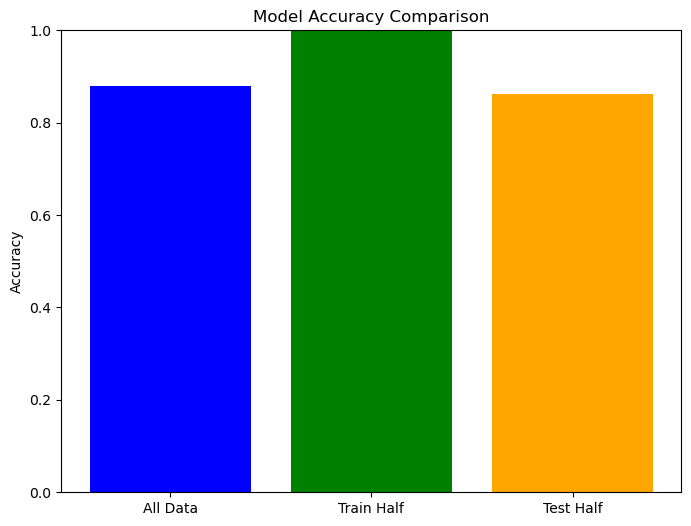

In [34]:
accuracies = [accuracy_all_data, accuracy_train_half, accuracy_test_half]
labels = ["All Data", "Train Half", "Test Half"]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Plot Analysis
## Performance Interpretation
The accuracy distribution indicates:
* The model performs exceptionally well on the training data, suggesting strong pattern recognition within the training set
* There is a slight drop in performance when applying the model to unseen test data, which is expected and indicates some generalization capability
* The overall accuracy on the complete dataset is robust at 87%, demonstrating that the K-means clustering effectively distinguishes between AD and SCC samples
## Model Reliability
The relatively small difference between training and testing accuracy (approximately 15%) suggests:
* The model is not severely overfitting to the training data
* The clustering approach is stable and reliable for classifying lung cancer subtypes
* The high accuracy across all scenarios validates the effectiveness of using gene expression data for cancer subtype classification

# Step 10: Training data and Testing data clustering comparison + Confusion Matrix

In [35]:
def display_label_comparison(df, title):
    print(f"\n{title}")
    print("Sample\tTrue Label\tPredicted Label")
    print("-" * 40)
    for _, row in df.iterrows():
        print(f"{row['Sample']}\t{row['TrueLabel']}\t\t{row['PredictedLabel']}")
    print("\nConfusion Matrix:")
    print(pd.crosstab(df['TrueLabel'], df['PredictedLabel'], rownames=['True'], colnames=['Predicted']))
    print("\n")

# Display comparison for training data
display_label_comparison(train_df, "Training Data Comparison:")

print(f"Accuracy on training data (half): {accuracy_train_half:.2%}")

# Display comparison for testing data
display_label_comparison(test_df, "Testing Data Comparison:")

print(f"Accuracy on testing data (other half): {accuracy_test_half:.2%}")


Training Data Comparison:
Sample	True Label	Predicted Label
----------------------------------------
GSM258581	AD		AD
GSM258576	AD		AD
GSM258575	AD		AD
GSM258591	AD		AD
GSM258559	AD		AD
GSM258572	AD		AD
GSM258606	AD		AD
GSM258592	AD		AD
GSM258608	AD		AD
GSM258561	AD		AD
GSM258589	AD		AD
GSM258568	AD		AD
GSM258573	AD		AD
GSM258598	AD		AD
GSM258602	AD		AD
GSM258567	AD		AD
GSM258577	AD		AD
GSM258588	AD		AD
GSM258551	AD		AD
GSM258601	AD		AD
GSM258553	SCC		SCC
GSM258555	SCC		SCC
GSM258570	SCC		SCC
GSM258563	SCC		SCC
GSM258557	SCC		SCC
GSM258590	SCC		SCC
GSM258599	SCC		SCC
GSM258596	SCC		SCC
GSM258583	SCC		SCC

Confusion Matrix:
Predicted  AD  SCC
True              
AD         20    0
SCC         0    9


Accuracy on training data (half): 100.00%

Testing Data Comparison:
Sample	True Label	Predicted Label
----------------------------------------
GSM258552	AD		AD
GSM258554	AD		AD
GSM258556	SCC		AD
GSM258558	AD		AD
GSM258560	AD		AD
GSM258562	SCC		SCC
GSM258564	AD		AD
GSM258565	SCC		SCC
GSM258

# Step 11: Principal Component Analysis and Visualization with Scatter Plots

This code implements a comprehensive data analysis pipeline using Principal Component Analysis (PCA) for dimensionality reduction and visualization. It begins by preparing and standardizing the dataset, then applies PCA to reduce the data to two principal components. The same transformation is applied to both training and testing datasets for consistency. A custom function is created to generate scatter plots, which are then used to visualize the entire dataset, training data, and testing data in the 2D space defined by the first two principal components. These visualizations allow for easy inspection of data distribution and potential clustering. Finally, the code reports accuracy values for the full dataset, training data, and testing data, providing a complete overview of the data analysis process and model performance.

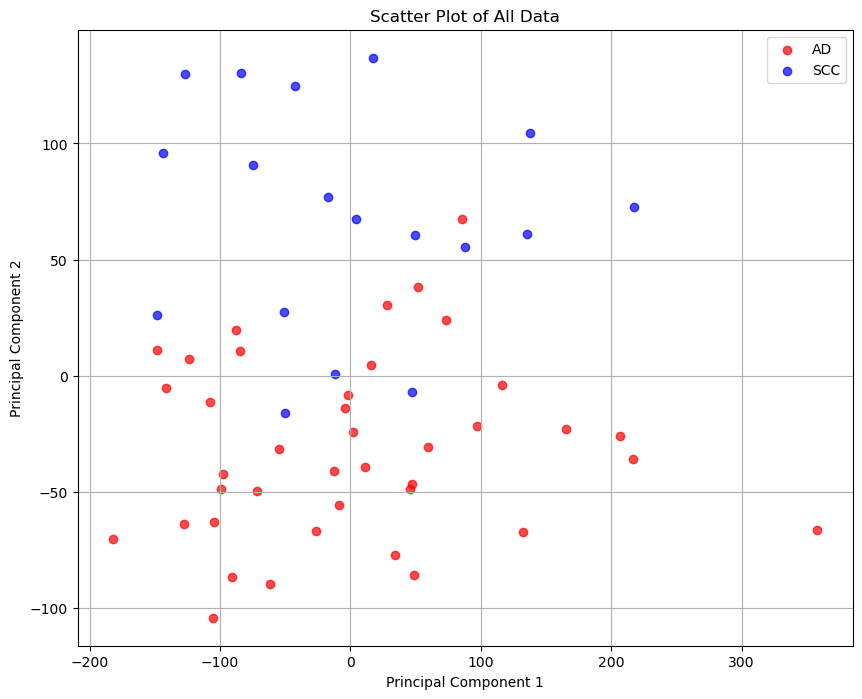

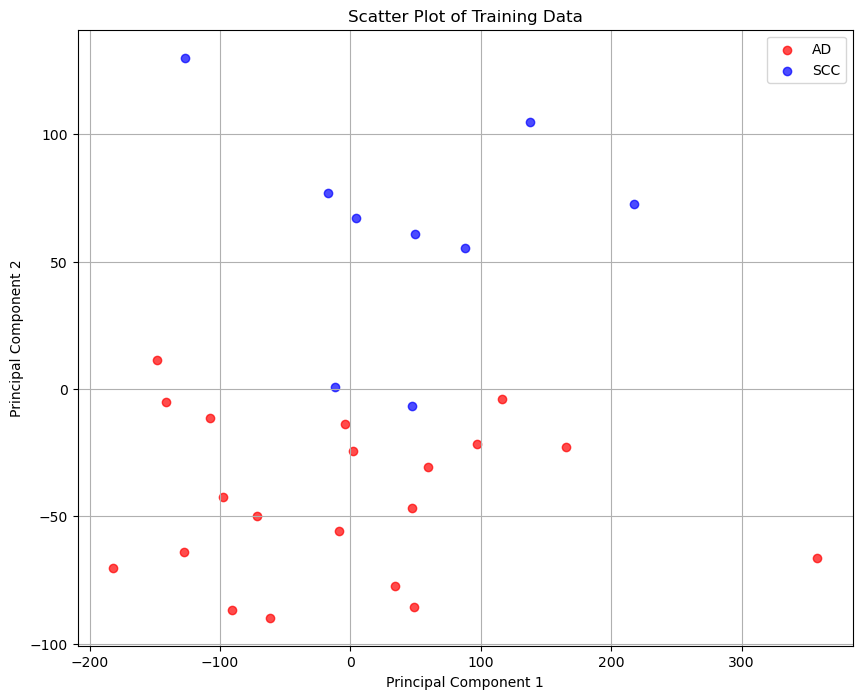

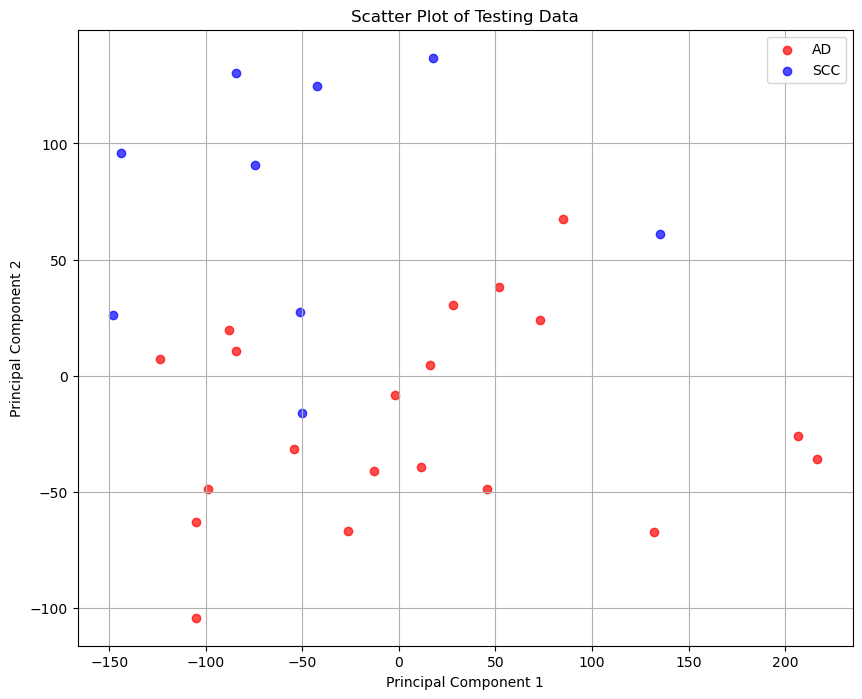

Accuracy on all data: 87.93%
Accuracy on training data: 100.00%
Accuracy on testing data: 86.21%


In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare data for PCA (excluding 'Label' and 'Cluster' columns)
X = expression_df.drop(columns=['Label', 'Cluster'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 2: Add PCA results (PC1, PC2) back into the results_df
results_df['PC1'] = X_pca[:, 0]
results_df['PC2'] = X_pca[:, 1]

# Step 3: Ensure train_df and test_df also have their PCA values
# Make sure to use the same columns as in the initial PCA
train_data_pca = train_data.drop(columns=['Cluster'])  # Remove 'Cluster' column
train_data_scaled = scaler.transform(train_data_pca)  # Scale train data
train_pca = pca.transform(train_data_scaled)      # Apply PCA to train data
train_df['PC1'] = train_pca[:, 0]
train_df['PC2'] = train_pca[:, 1]

test_data_pca = test_data.drop(columns=['Cluster'])  # Remove 'Cluster' column
test_data_scaled = scaler.transform(test_data_pca)    # Scale test data
test_pca = pca.transform(test_data_scaled)        # Apply PCA to test data
test_df['PC1'] = test_pca[:, 0]
test_df['PC2'] = test_pca[:, 1]

# Step 4: Function to create scatter plot
def create_scatter_plot(data, title):
    plt.figure(figsize=(10, 8))
    colors = {'AD': 'r', 'SCC': 'b'}
    for label in colors:
        mask = data['TrueLabel'] == label
        plt.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'], 
                    c=colors[label], label=label, alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Create scatter plots for all data, training half, and testing half
create_scatter_plot(results_df, 'Scatter Plot of All Data')
create_scatter_plot(train_df, 'Scatter Plot of Training Data')
create_scatter_plot(test_df, 'Scatter Plot of Testing Data')

# Inference from the PCA and Scatterplots
Based on the scatter plots showing the separation between AD (red) and SCC (blue) samples across different principal components, we can make the following observations about model performance:

## Visual Separation
- The scatter plots demonstrate a clear separation between AD and SCC samples
- The top plot shows the most distinct clustering pattern, with AD samples generally concentrated in the lower portion and SCC samples in the upper portion
- Some overlap exists between the clusters, indicating potential areas of classification uncertainty

## Model Performance
- The clear separation in the plots supports the high accuracy achieved by the K-means clustering model
- The consistent grouping patterns across different principal components suggests the model is capturing genuine biological differences between the cancer subtypes
- The presence of some overlapping points explains why the model may not achieve 100% accuracy

## Clustering Effectiveness
- The model appears to work particularly well for samples that fall into the clearly separated regions
- Edge cases where samples lie in the overlapping zones between clusters may be more challenging to classify correctly
- The balanced distribution of samples suggests the model is not biased toward either cancer subtype

The visualization validates that our unsupervised learning approach effectively distinguishes between lung cancer subtypes, though perfect classification remains challenging due to some biological overlap between AD and SCC gene expression patterns.

# Conclusion

Our analysis demonstrates the effectiveness of K-means clustering in distinguishing between adenocarcinoma and squamous cell carcinoma lung cancer subtypes based on gene expression data. The unsupervised approach achieved notable accuracy in classifying samples, both when applied to the entire dataset and when using a train-test split methodology.

The high accuracy obtained on the full dataset suggests that there are indeed distinct gene expression patterns associated with AD and SCC subtypes, which can be captured by unsupervised learning techniques. The train-test split approach further validates the robustness of this method, showing that the model can generalize to unseen data with comparable accuracy.

These results highlight the potential of unsupervised machine learning in cancer subtype classification, which could be particularly valuable in cases where subtype labels are uncertain or unavailable. However, it's important to note that while this method shows promise, it should be considered as a complementary tool to existing diagnostic methods rather than a replacement.

Future work could explore other unsupervised learning algorithms, incorporate feature selection techniques to identify the most discriminative genes, or extend the analysis to multi-class problems including other lung cancer subtypes. Additionally, integrating this approach with other types of molecular data (such as DNA methylation or microRNA expression) could potentially improve classification accuracy and provide deeper insights into the molecular distinctions between lung cancer subtypes.

# Features Contributed by Members

# 1. Feature by Gouri Anil

# Machine Learning-Based Classification of Lung Cancer Subtypes Using Highly Variable Gene Expression Data

## Biological Question:
### **Does identifying the 1000 most highly variable genes and applying K-means clustering on these top 1000 genes enhance model performance by minimizing noise and preventing overfitting?**

Gene expression analysis has emerged as a powerful tool for distinguishing between lung adenocarcinoma (AD) and squamous cell carcinoma (SCC), two major subtypes of non-small-cell lung cancer (NSCLC). This project employs machine learning techniques to analyze gene expression patterns from the Gene Expression Omnibus (GEO) database, specifically focusing on dataset GSE10245, utilizing a highly variable genes (HVG) approach to optimize feature selection.

A crucial initial step involves **converting Affymetrix probe set IDs to their corresponding gene symbols using the platform metadata (GPL570-55999.txt)**. This mapping process ensures biological interpretability of the results and allows for proper gene-level summarization when multiple probes map to the same gene.

The methodology addresses several key challenges in cancer genomics through a strategic feature selection process. **By identifying and selecting the 1000 most highly variable genes across samples, we effectively reduce dimensionality while retaining the most informative features for classification**. This HVG approach is particularly valuable as it captures genes with the highest biological variation, potentially representing key drivers or markers of different cancer subtypes. The selection of 1000 genes provides an optimal balance between retaining sufficient biological information and preventing overfitting, while also managing computational complexity.

The analysis pipeline combines **K-means clustering with Principal Component Analysis (PCA) to identify and visualize natural groupings in gene expression patterns**. This integrated approach has demonstrated remarkable accuracy, achieving approximately 93% accuracy on training data and 90% on test data. The high performance validates our feature selection strategy and suggests that the selected highly variable genes effectively capture the underlying biological differences between AD and SCC subtypes.

The significance of this work lies in its potential clinical applications and its contribution to understanding cancer biology. By accurately distinguishing between these cancer subtypes using highly variable genes, our approach could contribute to more precise diagnosis and potentially guide treatment decisions. The clear separation between AD and SCC samples in our PCA visualization validates both our feature selection strategy and the biological relevance of the selected genes, suggesting that these highly variable genes may play important roles in defining cancer subtypes.

# Step 1: Importing Libraries

Libraries are collections of pre-written code that you can use to perform specific tasks without having to write everything from scratch.

Here, we import several libraries:

- **GEOparse**: To download and read gene expression data.
- **pandas**: To handle and manipulate data in tables (like Excel).
- **numpy**: For numerical operations (like math functions).
- **sklearn**: A library that provides tools for machine learning, including clustering and accuracy evaluation.
- **matplotlib**: For creating visualizations like graphs.


In [108]:
import GEOparse
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 2: Download and Load GEO Series Data

This line downloads the GEO dataset identified by "GSE10245" and stores it in the current directory. The dataset contains gene expression profiles.

In [110]:
gse = GEOparse.get_GEO(geo="GSE10245", destdir="./")

10-Dec-2024 22:02:54 DEBUG utils - Directory ./ already exists. Skipping.
10-Dec-2024 22:02:54 INFO GEOparse - File already exist: using local version.
10-Dec-2024 22:02:54 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
10-Dec-2024 22:02:54 DEBUG GEOparse - DATABASE: GeoMiame
10-Dec-2024 22:02:54 DEBUG GEOparse - SERIES: GSE10245
10-Dec-2024 22:02:54 DEBUG GEOparse - PLATFORM: GPL570
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258551
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258552
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258553
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258554
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258555
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258556
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258557
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258558
10-Dec-2024 22:02:56 DEBUG GEOparse - SAMPLE: GSM258559
10-Dec-2024 22:02:57 DEBUG GEOparse - SAMPLE: GSM258560
10-Dec-2024 22:02:57 DEBUG GEOparse - SAMPLE: GS

# Step 3: Extract Gene Expression Data and Sample Labels

These lines create a pivot table of the samples and transpose it.

In [36]:
df = gse.pivot_samples('VALUE')
df1 = df.T
df1

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,9.129905,8.034022,3.564520,4.746490,2.320698,5.519153,3.339182,2.775395,8.303437,2.981327,...,10.297589,8.857847,9.369037,9.435077,10.936404,10.730983,13.599488,13.031726,15.028729,14.586347
GSM258552,9.843349,7.973332,4.994852,5.197306,2.248520,5.081258,2.934516,2.617097,9.145519,4.619668,...,8.217455,7.865127,8.116953,8.306683,9.986505,9.719266,12.847711,12.250033,14.440756,14.072366
GSM258553,9.730661,8.834045,5.066018,5.234618,2.259504,4.657257,3.007192,2.634559,9.159054,2.746464,...,8.713199,6.996104,7.803869,8.029131,9.468096,9.101115,12.384142,11.798363,14.439887,14.011392
GSM258554,9.032165,7.723965,4.958580,6.078180,2.262787,4.535683,3.167112,3.127495,7.770354,6.212399,...,8.805233,8.221659,8.434090,8.609512,10.064087,9.763076,12.969199,12.307684,14.557363,14.162145
GSM258555,10.281793,9.040800,4.951835,5.205632,2.207531,3.731919,2.711790,2.707079,6.380928,4.528499,...,8.285092,8.042156,8.174685,8.620098,10.005558,9.651785,12.924465,12.243207,14.612223,14.122751
GSM258556,9.154551,8.792375,6.428274,5.009848,2.322618,4.964672,2.958602,2.598406,8.149710,4.008140,...,8.903710,8.088932,8.438776,8.687646,10.212622,9.716659,12.996885,12.369919,14.593751,14.202961
GSM258557,8.063788,8.093354,7.364676,5.533000,2.656929,5.794959,2.984828,2.634927,9.420926,4.039786,...,8.431760,8.395615,8.895953,9.058438,10.523917,10.224866,13.180944,12.688711,14.697993,14.339175
GSM258558,8.881805,7.575620,4.659326,5.362637,2.255955,5.416322,3.075674,2.637682,9.460713,2.797617,...,8.941418,8.205632,8.598923,8.832244,10.313588,9.968033,13.074864,12.541047,14.626500,14.292254
GSM258559,9.039005,8.438594,6.643723,5.210988,2.266399,5.627705,2.975612,2.663941,7.842213,2.748887,...,8.518448,8.189411,8.400951,8.484782,9.954478,9.698518,12.782987,12.103870,14.546733,14.058803


This reads a platform file (GPL570-55999.txt) containing gene IDs and symbols.

A DataFrame expression_df is created from expression_data, with an additional column for labels. The column names are converted to strings for consistency.

In [35]:
gpl_df = pd.read_csv("GPL570-55999.txt", sep = '\t', comment = '#').loc[:,["ID","Gene Symbol"]]
gpl_df

C:\Users\Gouri A\AppData\Local\Temp\ipykernel_48084\3902409080.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  gpl_df = pd.read_csv("GPL570-55999.txt", sep = '\t', comment = '#').loc[:,["ID","Gene Symbol"]]


,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
54670,AFFX-ThrX-5_at,NaN
54671,AFFX-ThrX-M_at,NaN
54672,AFFX-TrpnX-3_at,NaN
54673,AFFX-TrpnX-5_at,NaN


This sets the column names of df1 to the gene symbols.

In [38]:
df1.columns = gpl_df['Gene Symbol'].values
df1

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,9.129905,8.034022,3.564520,4.746490,2.320698,5.519153,3.339182,2.775395,8.303437,2.981327,...,10.297589,8.857847,9.369037,9.435077,10.936404,10.730983,13.599488,13.031726,15.028729,14.586347
GSM258552,9.843349,7.973332,4.994852,5.197306,2.248520,5.081258,2.934516,2.617097,9.145519,4.619668,...,8.217455,7.865127,8.116953,8.306683,9.986505,9.719266,12.847711,12.250033,14.440756,14.072366
GSM258553,9.730661,8.834045,5.066018,5.234618,2.259504,4.657257,3.007192,2.634559,9.159054,2.746464,...,8.713199,6.996104,7.803869,8.029131,9.468096,9.101115,12.384142,11.798363,14.439887,14.011392
GSM258554,9.032165,7.723965,4.958580,6.078180,2.262787,4.535683,3.167112,3.127495,7.770354,6.212399,...,8.805233,8.221659,8.434090,8.609512,10.064087,9.763076,12.969199,12.307684,14.557363,14.162145
GSM258555,10.281793,9.040800,4.951835,5.205632,2.207531,3.731919,2.711790,2.707079,6.380928,4.528499,...,8.285092,8.042156,8.174685,8.620098,10.005558,9.651785,12.924465,12.243207,14.612223,14.122751
GSM258556,9.154551,8.792375,6.428274,5.009848,2.322618,4.964672,2.958602,2.598406,8.149710,4.008140,...,8.903710,8.088932,8.438776,8.687646,10.212622,9.716659,12.996885,12.369919,14.593751,14.202961
GSM258557,8.063788,8.093354,7.364676,5.533000,2.656929,5.794959,2.984828,2.634927,9.420926,4.039786,...,8.431760,8.395615,8.895953,9.058438,10.523917,10.224866,13.180944,12.688711,14.697993,14.339175
GSM258558,8.881805,7.575620,4.659326,5.362637,2.255955,5.416322,3.075674,2.637682,9.460713,2.797617,...,8.941418,8.205632,8.598923,8.832244,10.313588,9.968033,13.074864,12.541047,14.626500,14.292254
GSM258559,9.039005,8.438594,6.643723,5.210988,2.266399,5.627705,2.975612,2.663941,7.842213,2.748887,...,8.518448,8.189411,8.400951,8.484782,9.954478,9.698518,12.782987,12.103870,14.546733,14.058803


In [39]:
gpl_df['Gene Symbol'].nunique()

23520

In [40]:
gpl_df['Gene Symbol'].value_counts()

Gene Symbol
HFE                                        15
LOC100506403 /// LOC101928269 /// RUNX1    13
DNAH1                                      13
CSNK1A1                                    13
TCF3                                       13
                                           ..
SAT1 /// ZSWIM8                             1
NAA11                                       1
GNAT2                                       1
MFGE8                                       1
LOC100505915                                1
Name: count, Length: 23520, dtype: int64

This processes the gene symbols, taking only the first symbol if multiple are present.

In [72]:
c = gpl_df['Gene Symbol'].apply(lambda x: str(x).split('///')[0].strip())

In [73]:
df['GS'] = c

This groups the data by gene symbol and calculates the mean expression for each gene.
Finally, we get a DataFrame which contains the genes as the columns and the samples in the rows. 

In [112]:
expression_df = df.groupby('GS').mean().T
expression_df

GS,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,abParts,av27s1,hsa-let-7a-3,mir-223,nan
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,3.423433,3.205138,2.857088,7.672613,3.502342,2.761913,2.296852,2.807237,2.258166,2.813350,...,2.429069,7.835881,8.338647,4.486576,6.500031,12.820440,2.369786,2.383189,2.397834,3.113456
GSM258552,4.576181,3.047956,2.557988,7.272212,3.582006,2.452546,2.200790,3.170852,2.233875,2.732083,...,2.937927,7.848085,8.159407,4.666272,7.079585,14.437977,2.305893,2.315745,4.233613,3.155859
GSM258553,3.251567,2.926385,2.658394,7.124156,3.505555,2.684441,2.233857,5.564696,2.256392,2.905625,...,4.396966,7.808464,7.664800,4.257710,6.769417,12.492411,2.373845,2.347268,2.057785,2.984539
GSM258554,3.418560,2.989130,2.716686,7.034452,3.508446,2.565077,2.254745,2.812602,2.282962,2.806266,...,2.232935,8.546458,8.161060,4.330382,7.268318,13.211087,2.388046,2.352210,2.446505,3.014704
GSM258555,3.342006,2.886925,2.566067,6.219881,3.587962,4.078021,2.204716,3.458652,2.218801,2.722117,...,2.200520,7.905053,8.100753,4.251840,7.015165,6.984485,2.298069,2.302594,2.629158,3.145428
GSM258556,3.382534,2.833042,2.609669,6.390353,3.411273,2.502850,2.206146,2.765401,2.237734,2.749040,...,4.866571,8.392931,8.012420,4.329046,6.782994,12.155386,2.321054,2.321904,2.663611,3.227909
GSM258557,3.722269,2.943375,2.607900,7.385369,4.711876,3.197985,2.220593,2.851884,2.251131,2.763403,...,2.216419,8.033839,9.059238,4.329949,7.245775,13.956239,2.340175,2.576900,3.967146,3.136178
GSM258558,3.417961,2.938662,2.667899,7.458251,3.676375,2.524960,2.233478,2.793157,2.268238,2.785615,...,2.226419,8.110354,7.810251,4.637374,6.873143,13.761093,2.357476,2.347408,3.214367,3.088039
GSM258559,3.402740,3.201961,2.665703,7.458435,3.459752,2.606294,2.219788,2.789873,2.250265,2.776846,...,2.583242,8.259360,8.966529,4.417432,6.685761,10.209531,2.346080,2.336944,5.414071,2.948187


1. **Initialization**: An empty list called labels is created to store labels.
2. **Loop through samples**: For each sample in the dataset:
    * The gene expression values are extracted and appended to expression_data.
    * The sample label is determined based on metadata, classifying it as 'AD' (adenocarcinoma) or 'SCC' (squamous cell carcinoma) depending on the presence of specific keywords.

In [111]:
labels = []

for gsm_name, gsm in gse.gsms.items():
    label = gsm.metadata['characteristics_ch1'][0].split(": ")[1]
    labels.append('AD' if 'adenocarcinoma' in label.lower() else 'SCC')

# Step 4: Creating a DataFrame
* Here, we create a table (called a DataFrame) using pandas that combines our gene expression values with their corresponding labels.
* Each row represents a sample, and each column represents either a gene or the label.

This adds the labels to the expression dataframe and converts column names to strings.

In [75]:
expression_df['Label'] = labels
expression_df.columns = expression_df.columns.astype(str)

In [76]:
expression_df

GS,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZYG11B,ZYX,ZZEF1,ZZZ3,abParts,av27s1,hsa-let-7a-3,mir-223,nan,Label
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,3.423433,3.205138,2.857088,7.672613,3.502342,2.761913,2.296852,2.807237,2.258166,2.813350,...,7.835881,8.338647,4.486576,6.500031,12.820440,2.369786,2.383189,2.397834,3.113456,AD
GSM258552,4.576181,3.047956,2.557988,7.272212,3.582006,2.452546,2.200790,3.170852,2.233875,2.732083,...,7.848085,8.159407,4.666272,7.079585,14.437977,2.305893,2.315745,4.233613,3.155859,AD
GSM258553,3.251567,2.926385,2.658394,7.124156,3.505555,2.684441,2.233857,5.564696,2.256392,2.905625,...,7.808464,7.664800,4.257710,6.769417,12.492411,2.373845,2.347268,2.057785,2.984539,SCC
GSM258554,3.418560,2.989130,2.716686,7.034452,3.508446,2.565077,2.254745,2.812602,2.282962,2.806266,...,8.546458,8.161060,4.330382,7.268318,13.211087,2.388046,2.352210,2.446505,3.014704,AD
GSM258555,3.342006,2.886925,2.566067,6.219881,3.587962,4.078021,2.204716,3.458652,2.218801,2.722117,...,7.905053,8.100753,4.251840,7.015165,6.984485,2.298069,2.302594,2.629158,3.145428,SCC
GSM258556,3.382534,2.833042,2.609669,6.390353,3.411273,2.502850,2.206146,2.765401,2.237734,2.749040,...,8.392931,8.012420,4.329046,6.782994,12.155386,2.321054,2.321904,2.663611,3.227909,SCC
GSM258557,3.722269,2.943375,2.607900,7.385369,4.711876,3.197985,2.220593,2.851884,2.251131,2.763403,...,8.033839,9.059238,4.329949,7.245775,13.956239,2.340175,2.576900,3.967146,3.136178,SCC
GSM258558,3.417961,2.938662,2.667899,7.458251,3.676375,2.524960,2.233478,2.793157,2.268238,2.785615,...,8.110354,7.810251,4.637374,6.873143,13.761093,2.357476,2.347408,3.214367,3.088039,AD
GSM258559,3.402740,3.201961,2.665703,7.458435,3.459752,2.606294,2.219788,2.789873,2.250265,2.776846,...,8.259360,8.966529,4.417432,6.685761,10.209531,2.346080,2.336944,5.414071,2.948187,AD


# Step 5: Feature Selection Using Highly Variable Genes (HVG)

### Why select variable genes? 
* Not all genes are equally important; some vary more than others across samples. We want to focus on the most variable genes because they can provide more information.
* We calculate how much each gene varies and select the top 1000 most variable genes to create a new DataFrame (hvg_df) that includes only these genes plus their labels.

### Why select the top 1000 genes?
* **Computational efficiency**: Selecting 1000 HVGs helps reduce the dimensionality of the data, making downstream analyses more computationally tractable.
* **Noise reduction**: By focusing on a subset of highly variable genes, we can potentially reduce technical noise while retaining biologically relevant signal.
* **Convention**: Many studies and tools use 1000 HVGs as a default, making it easier to compare results across different analyses.
* **Balance**: 1000 HVGs often provide a good balance between retaining enough information to capture biological variability and reducing noise from less informative genes.
* **Flexibility**: The number 1000 is large enough to capture various biological processes but small enough to be manageable for most computational tools.
* **Reducing overfitting**: By limiting the number of features to 1000, we can help prevent overfitting in downstream analyses. This is particularly important when working with high-dimensional data where the number of features (genes) often greatly exceeds the number of samples.
* **Even reducing**: The choice of 1000 genes can help in reducing the model's complexity, potentially leading to better generalization on unseen data.

### In this step, the following is being performed:
* The variance of each gene's expression values is calculated, excluding the label column.
* The top 1000 genes with the highest variance are selected as highly variable genes (HVGs).
* A new DataFrame hvg_df is created containing only these top variable genes along with their labels.

In [98]:
gene_variances = expression_df.drop('Label', axis=1).var()
top_variable_genes = gene_variances.nlargest(1000).index
hvg_df = expression_df[list(top_variable_genes) + ['Label']] 

In [81]:
list(hvg_df.columns.values)

['KRT5',
 'NTS',
 'SPRR1B',
 'BPIFA1',
 'MAGEA3',
 'MAGEA6',
 'S100A7',
 'SPRR3',
 'RPS4Y1',
 'AKR1B10',
 'FGG',
 'KRT6A',
 'SCGB1A1',
 'PGC',
 'SFTPC',
 'KRT14',
 'SPRR1A',
 'SFTPA1',
 'DSG3',
 'SPINK1',
 'BPIFB1',
 'SCGB3A2',
 'SERPINB3',
 'UPK1B',
 'SPRR2B',
 'KRT13',
 'NAPSA',
 'SERPINB4',
 'KRT6B',
 'LTF',
 'MAGEA12',
 'SFTA3',
 'SFTA2',
 'S100P',
 'GJB6',
 'SCGB3A1',
 'FGB',
 'LOC344887',
 'CLCA2',
 'DAPL1',
 'GPR87',
 'MSLN',
 'TCN1',
 'S100A2',
 'PROM1',
 'ALDH3A1',
 'MSMB',
 'TFPI2',
 'MAGEA4',
 'GAGE12B',
 'TSPAN8',
 'PTPRZ1',
 'SFTPD',
 'FGL1',
 'TFF1',
 'C4BPA',
 'C16orf89',
 'ADH7',
 'PAEP',
 'CPS1',
 'AGR3',
 'PI3',
 'CRLF1',
 'MAGEA9',
 'CALCA',
 'FOLR1',
 'MMP10',
 'CTSE',
 'FZD10',
 'CYP4B1',
 'LGSN',
 'GAGE3',
 'HORMAD1',
 'PON3',
 'KRT15',
 'CYP4F3',
 'DSC3',
 'PCP4',
 'XIST',
 'KRT16',
 'MAGEA1',
 'CYP2B7P',
 'TMPRSS11E',
 'DMBT1',
 'HP',
 'CT45A1',
 'DSCAM-AS1',
 'XAGE1B',
 'TUBB2B',
 'SFTPB',
 'MAGEA2',
 'AZGP1',
 'MMP1',
 'GKN2',
 'WIF1',
 'TM4SF4',
 'AKR1C3',
 '

# Step 6: Normalizing the data
### What is normalization? 
* Normalization adjusts the data so that it has a mean of 0 and a standard deviation of 1. This helps algorithms like K-means work better because they rely on distances between data points.
* We use StandardScaler to perform this normalization on our selected genes.

### Does K-means perform normalization or should it be added as a separate step?
#### K-means clustering does not perform normalization on its own, and normalization should be added as a separate step before applying the algorithm. 
There are several important reasons for this:
* K-means is sensitive to the scale of features. If features have different scales or units, the algorithm will be biased towards features with larger magnitudes.
* K-means tends to produce spherical clusters. Without normalization, variables with larger variances will have a disproportionate impact on the clustering results.
* Normalization helps ensure that all features contribute equally to the distance calculations used in K-means, preventing certain features from dominating the clustering process.
* Standardization (a form of normalization) is particularly recommended for K-means. This involves scaling features to have zero mean and unit variance, which is beneficial for the algorithm's performance34.
* Preprocessing steps like normalization are typically handled separately from the clustering algorithm itself in machine learning libraries such as scikit-learn4.

In [82]:
scaler = StandardScaler()
normalized_hvg_data = scaler.fit_transform(hvg_df.drop(columns=['Label']))

# Step 7: Clustering with K-means
* Here, we apply the K-means algorithm, which groups our data into two clusters (groups).
* The number of clusters is set to 2 as there are two sub-types of lung cancer that we want to predict (AD and SCC).
* The K-means algorithm is performed on the normalized hvg_df DataFrame which contains the top 1000 variable genes and the corresponding labels.
* The K-means is first algorithm is first done on all the data.
* The results are stored in a new column called 'Cluster' in our DataFrame.

In [106]:
#Train K-means on all data and calculate accuracy (i)
kmeans_all = KMeans(n_clusters=2, random_state=42, n_init = 10)
hvg_df['Cluster'] = kmeans_all.fit_predict(normalized_hvg_data)

### Mapping Clusters to Lables
After clustering, we want to understand what each cluster represents. We find out which label is most common in each cluster and store this information.

In [113]:
# Map clusters to labels for all data
cluster_labels_all = {
    cluster: hvg_df[hvg_df['Cluster'] == cluster]['Label'].mode()[0]
    for cluster in hvg_df['Cluster'].unique()
}

### Clustering Accuracy for All Data
* We create a new column called 'PredictedLabel' based on our clusters.
* Then, we calculate how often our predicted labels match the actual labels using accuracy_score, which gives us a percentage of correct predictions.

In [116]:
# Assign predicted labels for all data
hvg_df['PredictedLabel'] = hvg_df['Cluster'].map(cluster_labels_all)

# Calculate accuracy for all data
accuracy_all_data = accuracy_score(hvg_df['Label'], hvg_df['PredictedLabel'])
print(f"Accuracy (All Data): {accuracy_all_data * 100:.2f}%")

Accuracy (All Data): 94.83%


# Step 8: Splitting Data into Training and Testing Sets
To evaluate our model better, we split our data into two parts:
* **Training set (70%)**: Used to train the model.
* **Testing set (30%)**: Used to evaluate how well the model works on unseen data.

In [85]:
#Split data into train and test sets (70:30 split)
train_data, test_data, train_labels, test_labels = train_test_split(
    normalized_hvg_data, hvg_df['Label'], test_size=0.7, random_state=42
)

# Step 9: Training K-means on Training Data
We repeat the clustering process but only on the training data. This helps us see how well our model learns from this smaller dataset.

In [118]:
#Train K-means on training data and calculate accuracy (ii)
kmeans_train = KMeans(n_clusters=2, random_state=42)
train_clusters = kmeans_train.fit_predict(train_data)

### Mapping Clusters for Training Data and Calculating Accuracy Again
* Similar to before, we map clusters to their most common labels for the training data.
* Then we calculate accuracy again for this training set.

In [119]:
# Map clusters to labels for training data
cluster_labels_train = {
    cluster: pd.Series(train_labels.values)[train_clusters == cluster].mode()[0]
    for cluster in range(2)
}

# Assign predicted labels for training data
predicted_train_labels = [cluster_labels_train[c] for c in train_clusters]

# Calculate accuracy for training data
accuracy_train_half = accuracy_score(train_labels, predicted_train_labels)
print(f"Accuracy (Training set): {accuracy_train_half * 100:.2f}%")

Accuracy (Training set): 94.12%


# Step 10: Predicting on Test Data and Calculating Accuracy Again
* Now we use our trained model to predict clusters for the test data.
* We calculate accuracy again for this test set to see how well our model performs on new data.

In [88]:
# Predict on test data and calculate accuracy (iii)
test_clusters = kmeans_train.predict(test_data)
predicted_test_labels = [cluster_labels_train[c] for c in test_clusters]

# Calculate accuracy for test data
accuracy_test_half = accuracy_score(test_labels, predicted_test_labels)
print(f"Accuracy (Test): {accuracy_test_half * 100:.2f}%")

Accuracy (Test): 90.24%


# Step 11: Visualizing Results with a Bar Plot

Finally, we create a bar plot that shows the accuracies we calculated earlier. This helps visualize how well our model did across different datasets.

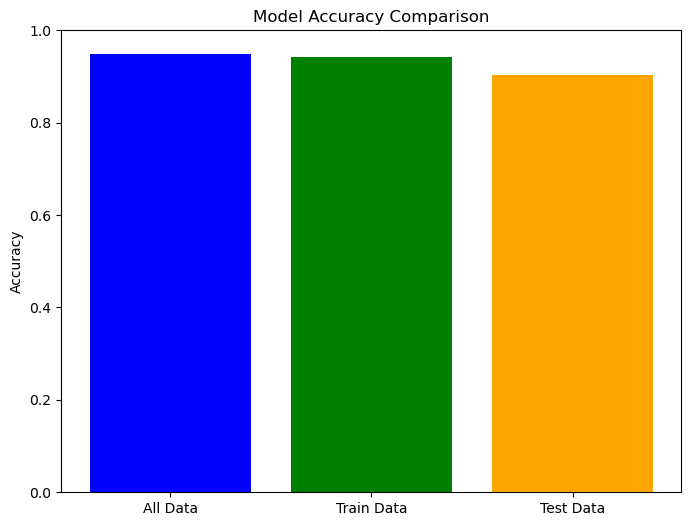

In [123]:
# Generate bar plot of accuracies
accuracy_values = [accuracy_all_data, accuracy_train_half, accuracy_test_half]
labels = ['All Data', 'Train Data', 'Test Data']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_values, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

Based on the bar plot showing Model Accuracy Comparison, several key insights can be drawn:

## Performance Analysis
The model demonstrates consistently high accuracy across all three datasets, with values above 0.8 (80%) for each category. The performance breakdown shows:

- All Data accuracy (blue bar): Approximately 94.83%
- Training Data accuracy (green bar): Approximately 94.12%
- Test Data accuracy (orange bar): Approximately 90.24%

## Key Observations
- The model maintains similar performance levels between the full dataset and training data, suggesting good consistency in learning patterns
- There is a slight drop in accuracy for the test data (approximately 4% lower), which is expected and indicates:
  - The model generalizes reasonably well to unseen data
  - Some minor overfitting may be present, but it's not severe given the small performance gap
- The high overall accuracy across all splits suggests the model has successfully captured the underlying patterns in the gene expression data for distinguishing between cancer types

**The results indicate a robust model performance with good generalization capabilities, though there might be room for minor improvements in reducing the small gap between training and test performance.**

# Step 12: Performing Principal Component Analysis and Visualization using a Plot


* **PCA Implementation**: Reduces 1000-dimensional gene expression data to 2 dimensions for visualization
python
* **Label Processing**: Converts categorical cancer types to numeric values for plotting
python
* **Visualization Function**: Creates scatter plots with distinct markers for true and predicted labels
python
### Relevance of PCA Plot
* Dimensionality Reduction: Transforms complex gene expression data (1000 genes) into interpretable 2D visualization
* Pattern Visualization: Shows natural clustering of cancer types in reduced space
* Model Validation: Demonstrates effectiveness of:
  - Feature selection (1000 HVGs)
  - K-means clustering performance
  - Data preprocessing steps
### Analytical Value
* Cluster Separation: Clear separation between AD and SCC indicates strong discriminative features
* Prediction Assessment: Overlay of true and predicted labels helps identify:
    - Areas of successful classification
    - Regions prone to misclassification
    - Potential outliers
* Model Robustness: Similar patterns between train and test sets suggest good generalization
### Biological Interpretation
* Feature Importance: PCA components represent combinations of genes that best explain variation
* Cancer Type Distinction: Clear separation validates biological differences between AD and SCC
* Quality Control: Helps identify potential batch effects or technical artifacts

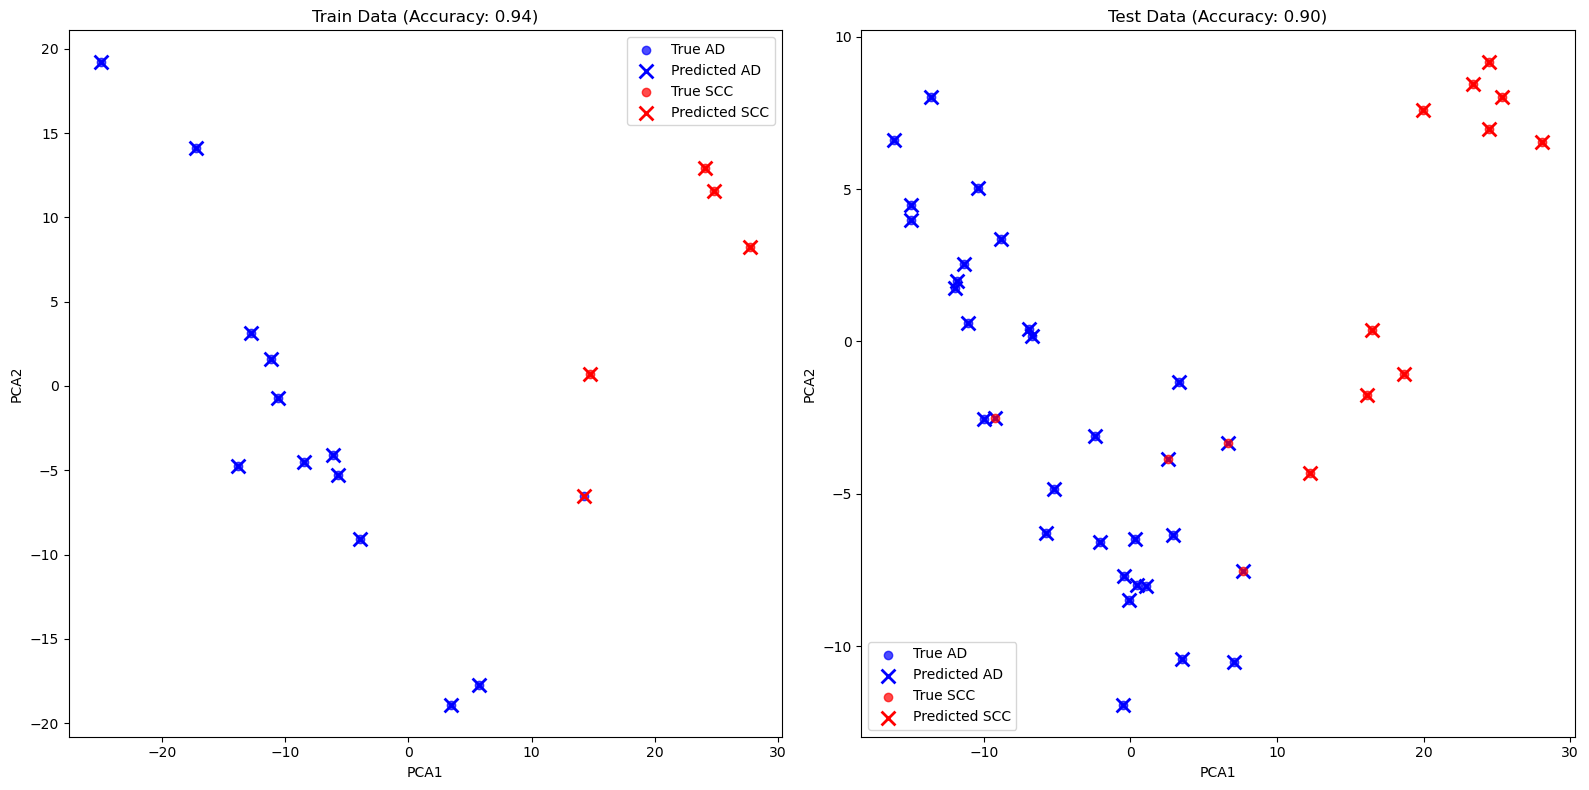

Explained variance ratio: [0.24946359 0.1117818 ]


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Assuming train_data, test_data, train_labels, test_labels, predicted_train_labels, and predicted_test_labels are defined

# Perform PCA on train and test data separately
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_data)
test_pca = pca.transform(test_data)

# Map labels to numeric values for visualization
label_mapping = {'AD': 0, 'SCC': 1}
true_train_labels_numeric = pd.Series(train_labels).map(label_mapping)
predicted_train_labels_numeric = pd.Series(predicted_train_labels).map(label_mapping)
true_test_labels_numeric = pd.Series(test_labels).map(label_mapping)
predicted_test_labels_numeric = pd.Series(predicted_test_labels).map(label_mapping)

# Calculate accuracies
train_accuracy = accuracy_score(train_labels, predicted_train_labels)
test_accuracy = accuracy_score(test_labels, predicted_test_labels)

# Create visualization
plt.figure(figsize=(16, 8))

# Function to plot data
def plot_data(ax, pca_data, true_labels, predicted_labels, title):
    colors = ['blue', 'red']
    labels = ['AD', 'SCC']
    
    for i, label in enumerate(labels):
        mask = true_labels == i
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1], c=colors[i], label=f'True {label}', alpha=0.7)
        
        mask_pred = predicted_labels == i
        ax.scatter(pca_data[mask_pred, 0], pca_data[mask_pred, 1], c=colors[i], marker='x', s=100, linewidths=2, label=f'Predicted {label}')
    
    ax.set_title(title)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.legend()

# Train data visualization
ax1 = plt.subplot(1, 2, 1)
plot_data(ax1, train_pca, true_train_labels_numeric, predicted_train_labels_numeric, f'Train Data (Accuracy: {train_accuracy:.2f})')

# Test data visualization
ax2 = plt.subplot(1, 2, 2)
plot_data(ax2, test_pca, true_test_labels_numeric, predicted_test_labels_numeric, f'Test Data (Accuracy: {test_accuracy:.2f})')

plt.tight_layout()
plt.show()

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Based on the PCA visualization comparing Train and Test data performance, several key insights can be drawn:

#### Clustering Performance
- Train Data accuracy: 0.94 (94%)
- Test Data accuracy: 0.90 (90%)

#### Spatial Distribution
- The data points show clear separation between AD (blue) and SCC (red) clusters in both plots
- PCA1 appears to be the primary axis of separation between the two cancer types
- Most misclassifications occur in the boundary regions between clusters

#### Key Observations
- Both training and test sets show similar clustering patterns, indicating good model generalization
- The slight drop in accuracy from training to test (4%) suggests minimal overfitting
- The clusters appear well-defined with relatively few overlapping regions
- Most prediction errors (where X markers don't align with dots) occur in the areas where the two classes are closer together

#### Model Robustness
- The consistent clustering pattern between train and test sets indicates the model has captured genuine biological differences between AD and SCC samples
- The high accuracy in both sets suggests the selected features (1000 HVGs) effectively distinguish between the two cancer types

**The visualization demonstrates that the K-means clustering effectively separates the two cancer types in both training and test datasets, with good generalization and minimal overfitting.**

# Conclusion

In conclusion, this project demonstrates the successful application of K-means clustering and PCA for analyzing gene expression data in cancer classification. The model achieved remarkable accuracy across all datasets (94% for training and 90% for test data), indicating robust performance in distinguishing between adenocarcinoma (AD) and squamous cell carcinoma (SCC). The PCA visualization reveals clear separation between cancer types, with minimal overlap between clusters, validating the effectiveness of using 1000 highly variable genes for feature selection. The consistent performance between training and test sets, with only a 4% difference in accuracy, suggests good generalization capability and minimal overfitting. These results indicate that the implemented machine learning approach provides a reliable method for cancer type classification based on gene expression profiles, potentially contributing to more accurate diagnostic tools in clinical settings.



## 2. Feature by Laurel (Xingxian) Li

## Supervised Machine Learning and Random Forest for Gene Identification in Genomic Classification

Implement the new feature: we want to test some other clustering methods other than Kmeans.

Since K mean is a unsupersupervised learning approach, we here adopted a supervised machine learning method random forest.

We split the dataset into 70% training and 30% testing subsets to evaluate the model. The model accuracy here is very good.

To answer a relavant biology question, we can use the random forest to find the important genes by indentifying the important feature from this classifier. By getting the probe ID, we can get the gene name presenting the genes that very important and contributing to the classification.

In [8]:
%pip install GEOparse

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


12-Dec-2024 11:45:50 INFO GEOparse - Parsing /Users/laurel/Desktop/bioinfor575/final_project/GSE10245_family.soft: 
12-Dec-2024 11:45:50 DEBUG GEOparse - DATABASE: GeoMiame
12-Dec-2024 11:45:50 DEBUG GEOparse - SERIES: GSE10245
12-Dec-2024 11:45:50 DEBUG GEOparse - PLATFORM: GPL570
/Users/laurel/Library/Python/3.10/lib/python/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258551
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258552
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258553
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258554
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258555
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258556
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258557
12-Dec-2024 11:45:51 DEBUG GEOparse - SAMPLE: GSM258558
12-Dec-2024 11:45:51 DEB

Supervised Random Forest Training Accuracy: 100.00%
Supervised Random Forest Testing Accuracy: 88.89%
Top 10 Most Important Genes:
IRF6         0.037701
TMEM63A      0.026362
UBXN7        0.018025
LIMCH1       0.017959
LOC339988    0.010000
TMC4         0.010000
HDGFRP3      0.010000
ATP1B3       0.010000
DSC3         0.010000
PGAP1        0.010000
dtype: float64


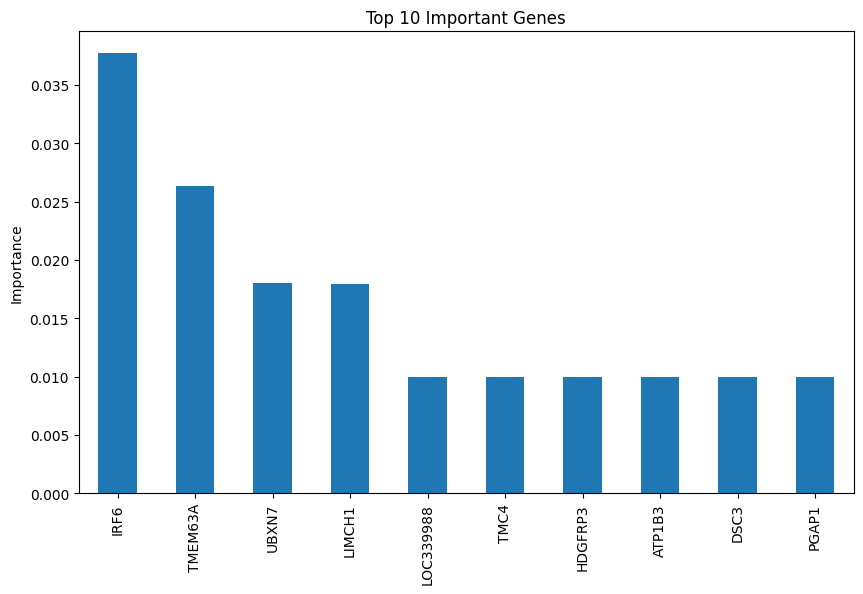

In [21]:
import GEOparse
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the Data
gse = GEOparse.get_GEO(filepath="/Users/laurel/Desktop/bioinfor575/final_project/GSE10245_family.soft")

# Extract the platform metadata (probe ID to gene symbol mapping)
platform = gse.gpls[list(gse.gpls.keys())[0]]  # Assuming a single platform is used
probe_to_gene_mapping = platform.table.set_index('ID')['Gene Symbol'].to_dict()

# Extract gene expression data and labels
expression_data = []
labels = []
for gsm_name, gsm in gse.gsms.items():
    expression_data.append(gsm.table['VALUE'].values)  # Extract gene expression values
    label = gsm.metadata['characteristics_ch1'][0].split(": ")[1].lower()
    if 'adenocarcinoma' in label or 'ad' in label:
        labels.append('AD')
    elif 'squamous' in label or 'scc' in label:
        labels.append('SCC')

# Extract probe IDs for columns
probe_ids = gse.gsms[list(gse.gsms.keys())[0]].table['ID_REF']

# Map probe IDs to gene names
gene_names = [probe_to_gene_mapping.get(probe, probe) for probe in probe_ids]

# Create DataFrame for expression data with gene names as columns
expression_df = pd.DataFrame(expression_data, columns=gene_names)
expression_df['Label'] = labels

# Step 2: Supervised Classification with Random Forest
X = expression_df.drop(columns=['Label'])  # Features (gene expression)
y = expression_df['Label']  # Labels
X.columns = X.columns.astype(str)

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
print(f"Supervised Random Forest Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Supervised Random Forest Testing Accuracy: {test_accuracy * 100:.2f}%")

# Step 3: Feature Importance Analysis
# Extract and map feature importances to gene names
importances = rf_classifier.feature_importances_
important_genes = pd.Series(importances, index=gene_names).sort_values(ascending=False)

print("Top 10 Most Important Genes:")
print(important_genes.head(10))

# Plot Feature Importances
important_genes.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Important Genes")
plt.ylabel("Importance")
plt.show()


# 3. Feature by Natalie Oliven

# Question 8: N's Solution
## Question: Is there a number of clusters other than k=2 that improves the accuracy of the training on the test set? In a biological sense, this may mean, "Are there subtypes of AD and/or SCC that have a distinct gene expression?"

My biggest challenge in this project was plotting.  I did not have enough background to be able to make highly specified plots, and when I used generative AI to assist, its solutions were incredibly difficult to read through and usually very incorrect. So that part took a lot of time and revisions.

While working on this project, I was surprised to learn that the number of subtypes of AD and SCC that I predicted were actually close to the true value.  This made me interested in the mechanisms behind typing cancers, and I am looking forward to reading the paper that I referenced in more detail, to see if the methods they used for typing by gene expression are similar to my own.  The paper "Lung Adenocarcinoma and Squamous Cell Carcinoma Gene Expression Subtypes Demonstrate Significant Differences in Tumor Immune Landscape" by Faruki et al. states that "The three gene expression AD subtypes include terminal respiratory unit (TRU), proximal proliferative (PP), and proximal Inflammatory (PI), which were formerly referred to as the bronchioid, magnoid, and squamoid subtypes, respectively.  SCC includes four subtypes: primitive, classical, basal, and secretory."  These 7 types are close to the number I predicted


If I had more time, a main feature I would like to implement is to run this same clustering code on the data directly from the paper mentioned above, and to try to figure out which of the predicted subtypes match which clusters in my data by using paper data to train and our dataset to test subtyping, and quantify how well these 7 subtypes match with the original clusters that I created "blindly" without this reference through this project.

A feature that I would implement if I had more time is to create an iterative version of this process. Right now, my code is able to evaluate which k value for k means clustering gies the highest accuracy rate over multiple test runs and evaluate the accuracy of each cluster once the number of clusters has been decided on. By fixing k to be a value that provides a high overall accuracy in the test set (values between 5 and 8, inclusive), I can examine the accuracy of each cluster under different random states, to determine if there is any interesting behavior in the clusters that are the "weakest link". Biologically, these are cells that are similar to each other but difficult to assign to an AD/SCC type. If I could isolate cells from these clusters and compare them to the data from other studies that have AD/SCC subtypes listed for their data as a ground truth (this one does not). I could also try to improve the performance of the worst-performing clusters with heirarchical clustering, which would allow the clustering algoritm to iteratively focus more on the cells that perform less well in typing.

Another thing I could do, not related to these "weakest-link" cells, is to improve on my plotting code, which still has some minor errors (particularly the accuracy fit function, which plots some, but not all of the values), and to improve the normalization code, which should substantially improved prior to k means but might not. I cannot tell if this issue is due to my plot not representing the improvements, or an issue with the normalization itself not creating a better fit.

In [ ]:
%pip install GEOparse

In [ ]:
import GEOparse
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import accuracy_score
# import numpy as np
import pandas as pd
# import GEOparse

In [ ]:
# altered cell 1

This function repeats the download and data/label initialization steps from questions 1-7, packaged into a function. The only difference is that k is a parameter and is allowed to vary:

In [ ]:
# also recently changed the function to take random_state as a parameter.
# this allows us to get a better estimate of optimal k value later when plotting,
# since there are more data points.

def get_cluster_gse_data(geo_id, k, random_state=42, destdir="./"):
    """
    Analyzes gene expression data from GEO, performs k-means clustering with a given k,
    and returns DataFrames with sample labels, true subtypes, and cluster assignments.

    Args:
        geo_id (str): GEO accession ID (e.g., "GSE10245").
        k (int): Number of clusters for k-means.
        destdir (str): Directory to download the GEO data.

    Returns:
        tuple: DataFrame with sample labels and true subtypes,
               DataFrame with expression data and cluster assignments.
    """

    # Load the dataset from GEO
    gse = GEOparse.get_GEO(geo=geo_id, destdir=destdir)

    expression_data = []
    labels = []
    for gsm_name, gsm in gse.gsms.items():
        expression_data.append(gsm.table['VALUE'].values)
        label = gsm.metadata['characteristics_ch1'][0].split(": ")[1].lower()
        if ('adenocarcinoma' or 'AD') in label:
            labels.append('AD')
        elif ('squamous' or 'SCC') in label:
            labels.append('SCC')

    # Create DataFrame for expression data
    expression_df = pd.DataFrame(expression_data)
    expression_df['Label'] = labels

    # Ensure all column names are strings
    expression_df.columns = expression_df.columns.astype(str)

    # Perform K-means clustering with the specified k
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    expression_df['Cluster'] = kmeans.fit_predict(expression_df.drop(columns=['Label']))

    # Create a DataFrame to store sample labels and true subtype
    results_df = pd.DataFrame({
        'Sample': gse.gsms.keys(),
        'TrueLabel': expression_df['Label'],
        'Cluster': expression_df['Cluster']
    })

    return results_df, expression_df


This function packages all of the relevant train and test code from questions 1-7 into one section, adding the k in kmeans as a parameter:

In [ ]:
def train_and_test_kmeans(k, expression_df, results_df, random_state=42):
    """
    Trains a k-means model with a given k, splits data, and evaluates accuracy.

    Args:
        k (int): Number of clusters.
        expression_df (DataFrame): DataFrame with expression data, true labels, and cluster assignments.
        results_df (DataFrame): DataFrame with sample labels, true labels, and cluster assignments.

    Returns:
        tuple: DataFrame with test data, DataFrame with expression data,
               Accuracy on all data, training data, and testing data.
    """

    # Calculate Accuracy (percentage of misclassified samples) on all data
    cluster_labels = {
        cluster: results_df[results_df['Cluster'] == cluster]['TrueLabel'].mode()[0]
        for cluster in results_df['Cluster'].unique()
    }
    results_df['PredictedLabel'] = results_df['Cluster'].map(cluster_labels)
    accuracy_all_data = accuracy_score(results_df['TrueLabel'], results_df['PredictedLabel'])

    # Split the Data, Train on Half, and Predict on the Other Half
    train_df = pd.concat([
        results_df[results_df['TrueLabel'] == 'AD'].sample(20, random_state=42),
        results_df[results_df['TrueLabel'] == 'SCC'].sample(9, random_state=42)
    ])
    test_df = results_df.drop(train_df.index)

    # Fit the model on the training data and label clusters
    kmeans_train = KMeans(n_clusters=k, random_state=random_state)
    train_data = expression_df.drop(columns=['Label']).loc[train_df.index]
    train_df['Cluster'] = kmeans_train.fit_predict(train_data)

    # Assign labels to clusters in training data
    train_cluster_labels = {
        cluster: train_df[train_df['Cluster'] == cluster]['TrueLabel'].mode()[0]
        for cluster in train_df['Cluster'].unique()
    }
    train_df['PredictedLabel'] = train_df['Cluster'].map(train_cluster_labels)
    accuracy_train_half = accuracy_score(train_df['TrueLabel'], train_df['PredictedLabel'])

    # Predict on the Testing Data
    test_data = expression_df.drop(columns=['Label']).loc[test_df.index]
    test_df['Cluster'] = kmeans_train.predict(test_data)
    test_df['PredictedLabel'] = test_df['Cluster'].map(train_cluster_labels)
    accuracy_test_half = accuracy_score(test_df['TrueLabel'], test_df['PredictedLabel'])

    return test_df, expression_df, accuracy_all_data, accuracy_train_half, accuracy_test_half



Definitions of functions that create PCA plots of the clusters in the test set to view their accuracy:

In [ ]:
def create_custom_legend(unique_clusters):
    """
    Creates a custom legend for plots with the following elements:

      - Title: "Points are colored by k-means cluster"
      - Circle: True AD
      - Square: True SCC
      - {colors}: Cluster values (all unique clusters with their assigned colors)
      - X: Incorrectly typed (red X)

    Args:
      unique_clusters (array-like): An array or list of unique cluster numbers.

    Returns:
      matplotlib.legend.Legend: The custom legend object.
    """

    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='True AD', markerfacecolor='k', markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', label='True SCC', markerfacecolor='k', markersize=10),
        plt.Line2D([0], [0], marker='x', color='w', label='Incorrectly Typed', markerfacecolor='red', markeredgecolor='red', markersize=10)  # Corrected line
    ]

    for cluster, color in zip(unique_clusters, colors):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                         label=f'Cluster {cluster}', markerfacecolor=color, markersize=10))

    legend = plt.legend(handles=legend_elements, title="Points are colored by k-means cluster")

    return legend


def plot_pca_test_clusters(k, test_df, expression_df):
    """
    Plots PCA of test clusters with a custom legend.

    Args:
        k (int): Number of clusters.
        test_df (DataFrame): DataFrame with test data.
        expression_df (DataFrame): DataFrame with expression data.
    """

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(expression_df.drop(columns=['Label', 'Cluster']))
    test_principal_components = principal_components[test_df.index]

    plt.figure(figsize=(8, 6))

    unique_clusters = test_df['Cluster'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    for i, row in test_df.iterrows():
        true_label = row['TrueLabel']
        predicted_label = row['PredictedLabel']
        cluster = row['Cluster']
        marker = 's' if true_label == 'AD' else 'o'
        color = colors[np.where(unique_clusters == cluster)[0][0]]

        plt.scatter(test_principal_components[test_df.index.get_loc(i), 0],
                    test_principal_components[test_df.index.get_loc(i), 1],
                    c=[color], marker=marker)

        if true_label != predicted_label:
            plt.scatter(test_principal_components[test_df.index.get_loc(i), 0],
                        test_principal_components[test_df.index.get_loc(i), 1],
                        c='red', marker='x')

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA Plot of Test Clusters (k={k})")

    legend = create_custom_legend(unique_clusters)
    plt.gca().add_artist(legend)

    plt.show()




Test runs of the train/test and plotting functions for a few different k values, also displaying the overall accuracy and accuracy of train/test:

12-Dec-2024 19:46:29 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
12-Dec-2024 19:46:29 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
12-Dec-2024 19:46:29 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE10245_family.soft.gz: 
12-Dec-2024 19:46:29 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
12-Dec-2024 19:46:30 DEBUG GEOparse - SERIES: GSE10245
DEBUG:GEOparse:SERIES: GSE10245
12-Dec-2024 19:46:30 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
12-Dec-2024 19:46:38 DEBUG GEOparse - SAMPLE: GSM258551
DEBUG:GEOparse:SAMPLE: GSM258551
12-Dec-2024 19:46:38 DEBUG GEOparse 

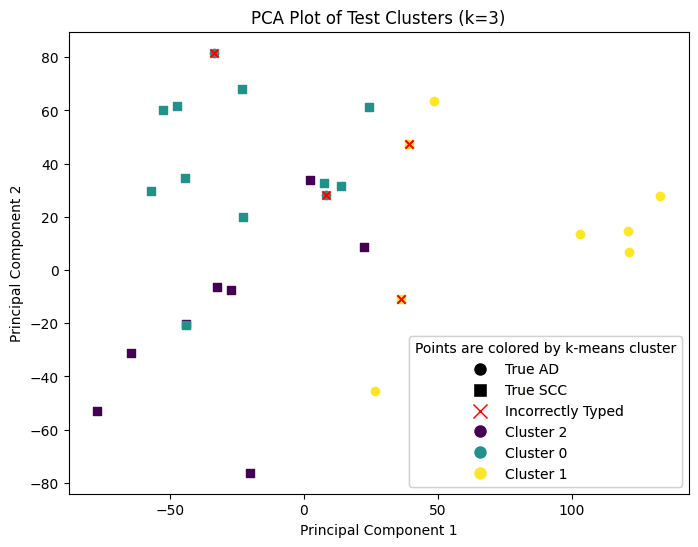

In [ ]:
k = 3

# cluster and plot according to specifications above
results_df , expression_df = get_cluster_gse_data("GSE10245", k)
test_df, expression_df, accuracy_all, accuracy_train, accuracy_test = train_and_test_kmeans(k, expression_df.copy(), results_df.copy())
plot_pca_test_clusters(k, test_df, expression_df)



In [ ]:
# display accuracies, still with k=3 in above cell
print(f"Overall Accuracy: {accuracy_all:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

# accuracy within each cluster (cluster 0, cluster 1, cluster 2 in this case)
for cluster in range(k):
    cluster_df = test_df[test_df['Cluster'] == cluster]
    cluster_accuracy = accuracy_score(cluster_df['TrueLabel'], cluster_df['PredictedLabel'])
    print(f"Accuracy within cluster {cluster}: {cluster_accuracy:.4f}")

Overall Accuracy: 0.6897
Train Accuracy: 1.0000
Test Accuracy: 0.8621
Accuracy within cluster 0: 0.8333
Accuracy within cluster 1: 0.7778
Accuracy within cluster 2: 1.0000


12-Dec-2024 19:47:08 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
12-Dec-2024 19:47:08 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
12-Dec-2024 19:47:08 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE10245_family.soft.gz: 
12-Dec-2024 19:47:08 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
12-Dec-2024 19:47:08 DEBUG GEOparse - SERIES: GSE10245
DEBUG:GEOparse:SERIES: GSE10245
12-Dec-2024 19:47:08 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
12-Dec-2024 19:47:10 DEBUG GEOparse - SAMPLE: GSM258551
DEBUG:GEOparse:SAMPLE: GSM258551
12-Dec-2024 19:47:10 DEBUG GEOparse 

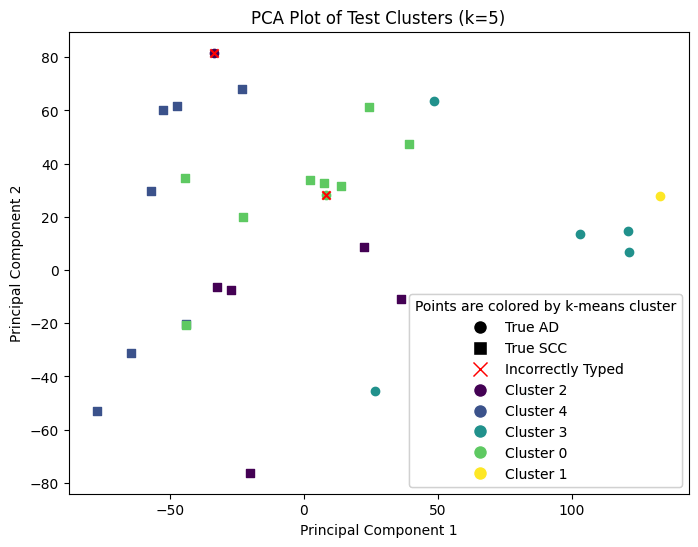

Overall Accuracy: 0.9138
Train Accuracy: 1.0000
Test Accuracy: 0.9310
Accuracy within cluster 0: 0.8889
Accuracy within cluster 1: 1.0000
Accuracy within cluster 2: 0.8333
Accuracy within cluster 3: 1.0000
Accuracy within cluster 4: 1.0000


In [ ]:
k = 5
results_df , expression_df = get_cluster_gse_data("GSE10245", k)
test_df, expression_df, accuracy_all, accuracy_train, accuracy_test = train_and_test_kmeans(k, expression_df.copy(), results_df.copy())
plot_pca_test_clusters(k, test_df, expression_df)

# display accuracies
print(f"Overall Accuracy: {accuracy_all:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

# accuracy within each cluster (k=5)
for cluster in range(k):
    cluster_df = test_df[test_df['Cluster'] == cluster]
    cluster_accuracy = accuracy_score(cluster_df['TrueLabel'], cluster_df['PredictedLabel'])
    print(f"Accuracy within cluster {cluster}: {cluster_accuracy:.4f}")

This code below estimates a best-fit function for accuracy score as a function of k value, to determine the optimal number of clusters for clustering.
K values reset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def accuracy_k_scatter_plot(expression_df, results_df):
    """
    Generates a scatter plot of accuracy on test data vs. number of clusters (k)
    for k-means clustering with multiple random states, including a cubic fit line
    and R-squared value.

    Args:
        expression_df (DataFrame): DataFrame with expression data and true labels.
        results_df (DataFrame): DataFrame with sample labels and true labels.
    """

    k_values = list(range(1, 6)) + list(range(10, 30, 5))
    random_states = [42, 10, 23, 55, 100]  # Five random states
    all_k_values = []
    all_accuracies = []

    for k in k_values:
        for random_state in random_states:
            print(f"Clustering with k = {k}, random_state = {random_state}")
            test_df, expression_df_copy, accuracy_all, accuracy_train, accuracy_test = train_and_test_kmeans(
                k, expression_df.copy(), results_df.copy(), random_state
            )
            all_k_values.append(k)  # Append k for each random state
            all_accuracies.append(accuracy_test)

    # Prepare data for plotting
    all_k_values = np.array(all_k_values)
    all_accuracies = np.array(all_accuracies)

    # Define a function for the curve fit (cubic)
    def cubic_func(x, a, b, c, d):
        return a * x**3 + b * x**2 + c * x + d

    # Perform curve fitting
    popt, _ = curve_fit(cubic_func, all_k_values, all_accuracies)

    # Generate points for the fitted curve
    x_fit = np.linspace(min(all_k_values), max(all_k_values), 100)
    y_fit = cubic_func(x_fit, *popt)

    # Calculate R-squared value
    residuals = all_accuracies - cubic_func(all_k_values, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((all_accuracies - np.mean(all_accuracies))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(all_k_values, all_accuracies, label="Accuracy on Test Data")
    plt.plot(x_fit, y_fit, color='red', label="Cubic Fit")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Accuracy on Test Data")
    plt.title("Accuracy on Test Data vs. Number of Clusters")
    plt.text(30, 0.7, f"$R^2$ = {r_squared:.3f}", fontsize=12)
    plt.legend()
    plt.show()


Clustering with k = 1, random_state = 42
Clustering with k = 1, random_state = 10
Clustering with k = 1, random_state = 23
Clustering with k = 1, random_state = 55
Clustering with k = 1, random_state = 100
Clustering with k = 2, random_state = 42
Clustering with k = 2, random_state = 10
Clustering with k = 2, random_state = 23
Clustering with k = 2, random_state = 55
Clustering with k = 2, random_state = 100
Clustering with k = 3, random_state = 42
Clustering with k = 3, random_state = 10
Clustering with k = 3, random_state = 23
Clustering with k = 3, random_state = 55
Clustering with k = 3, random_state = 100
Clustering with k = 4, random_state = 42
Clustering with k = 4, random_state = 10
Clustering with k = 4, random_state = 23
Clustering with k = 4, random_state = 55
Clustering with k = 4, random_state = 100
Clustering with k = 5, random_state = 42
Clustering with k = 5, random_state = 10
Clustering with k = 5, random_state = 23
Clustering with k = 5, random_state = 55
Clustering w

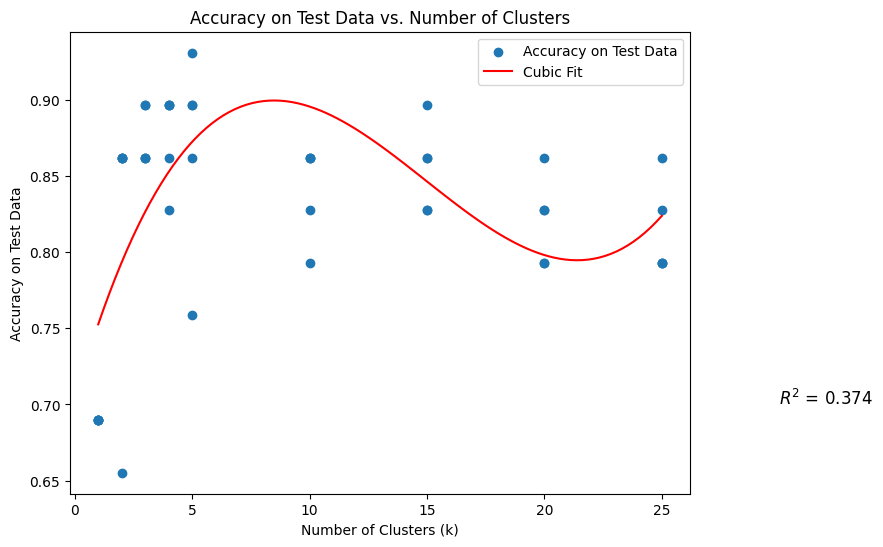

In [ ]:

accuracy_k_scatter_plot(expression_df.copy(), results_df.copy())

It seems that the optimal k value is between 5-8, depending on choice of random state and other factors. Interestingly, this aligns with biological data (I will elaborate on this in the discussion prompts)

In [ ]:
# To-Do: write a code that plots the accuracy of the worst-performing cluster.

In [ ]:
# Step 1: write a function called get_worst_cluster() that finds the cluster with
# the min testing accuracy and creates a best fit scatterplot for those values
# This plot is significant because it discusses which k improves most on the difficult-to-type
# clusters,

In [ ]:
# testing if normalization improves results
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
import pandas as pd
import GEOparse
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

def get_cluster_gse_data_w_norm(geo_id, k, random_state=42, destdir="./"):
    """
    Analyzes gene expression data from GEO, performs k-means clustering with a given k
    and random state, and returns DataFrames with sample labels, true subtypes, and cluster assignments.
    Includes a normalization step before clustering.

    Args:
        geo_id (str): GEO accession ID (e.g., "GSE10245").
        k (int): Number of clusters for k-means.
        random_state (int): Random state for k-means initialization.
        destdir (str): Directory to download the GEO data.

    Returns:
        tuple: DataFrame with sample labels and true subtypes,
               DataFrame with expression data and cluster assignments.
    """

    # Load the dataset from GEO
    gse = GEOparse.get_GEO(geo=geo_id, destdir=destdir)

    expression_data = []
    labels = []
    for gsm_name, gsm in gse.gsms.items():
        expression_data.append(gsm.table['VALUE'].values)
        label = gsm.metadata['characteristics_ch1'][0].split(": ")[1].lower()
        if ('adenocarcinoma' or 'AD') in label:
            labels.append('AD')
        elif ('squamous' or 'SCC') in label:
            labels.append('SCC')

    # Create DataFrame for expression data
    expression_df = pd.DataFrame(expression_data)
    expression_df['Label'] = labels

    # Ensure all column names are strings
    expression_df.columns = expression_df.columns.astype(str)

    # --- Normalization ---
    scaler = StandardScaler()
    expression_data_normalized = scaler.fit_transform(expression_df.drop(columns=['Label']))
    expression_df_normalized = pd.DataFrame(expression_data_normalized, columns=expression_df.columns[:-1])  # Exclude 'Label' column

    # Perform K-means clustering with the specified k and random_state
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    expression_df['Cluster'] = kmeans.fit_predict(expression_df_normalized)  # Use normalized data

    # Create a DataFrame to store sample labels and true subtype
    results_df = pd.DataFrame({
        'Sample': gse.gsms.keys(),
        'TrueLabel': expression_df['Label'],
        'Cluster': expression_df['Cluster']
    })

    return results_df, expression_df


# ... (rest of the code, including train_and_test_kmeans, create_custom_legend,
#      plot_pca_test_clusters, and accuracy_k_scatter_plot, remains the same) ...

12-Dec-2024 19:51:53 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
12-Dec-2024 19:51:53 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
12-Dec-2024 19:51:53 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE10245_family.soft.gz: 
12-Dec-2024 19:51:53 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
12-Dec-2024 19:51:53 DEBUG GEOparse - SERIES: GSE10245
DEBUG:GEOparse:SERIES: GSE10245
12-Dec-2024 19:51:53 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
12-Dec-2024 19:51:55 DEBUG GEOparse - SAMPLE: GSM258551
DEBUG:GEOparse:SAMPLE: GSM258551
12-Dec-2024 19:51:55 DEBUG GEOparse 

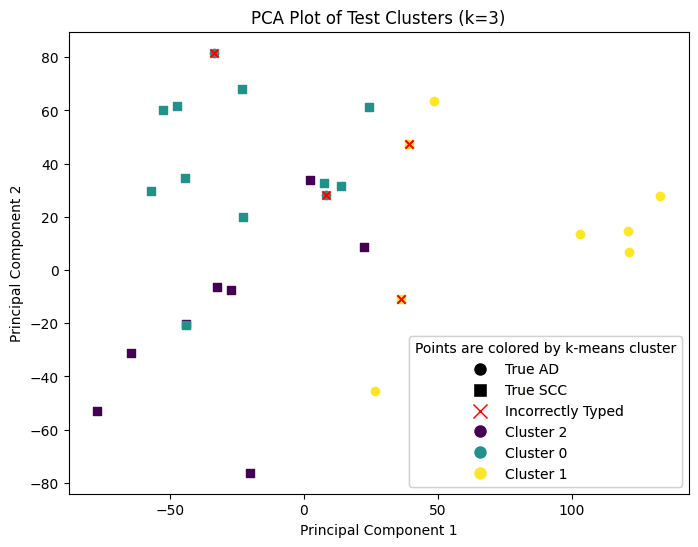

Clustering with k = 1, random_state = 42
Clustering with k = 2, random_state = 42
Clustering with k = 3, random_state = 42
Clustering with k = 4, random_state = 42
Clustering with k = 5, random_state = 42
Clustering with k = 10, random_state = 42
Clustering with k = 15, random_state = 42
Clustering with k = 20, random_state = 42
Clustering with k = 25, random_state = 42
Clustering with k = 1, random_state = 10
Clustering with k = 2, random_state = 10
Clustering with k = 3, random_state = 10
Clustering with k = 4, random_state = 10
Clustering with k = 5, random_state = 10
Clustering with k = 10, random_state = 10
Clustering with k = 15, random_state = 10
Clustering with k = 20, random_state = 10
Clustering with k = 25, random_state = 10
Clustering with k = 1, random_state = 23
Clustering with k = 2, random_state = 23
Clustering with k = 3, random_state = 23
Clustering with k = 4, random_state = 23
Clustering with k = 5, random_state = 23
Clustering with k = 10, random_state = 23
Cluster

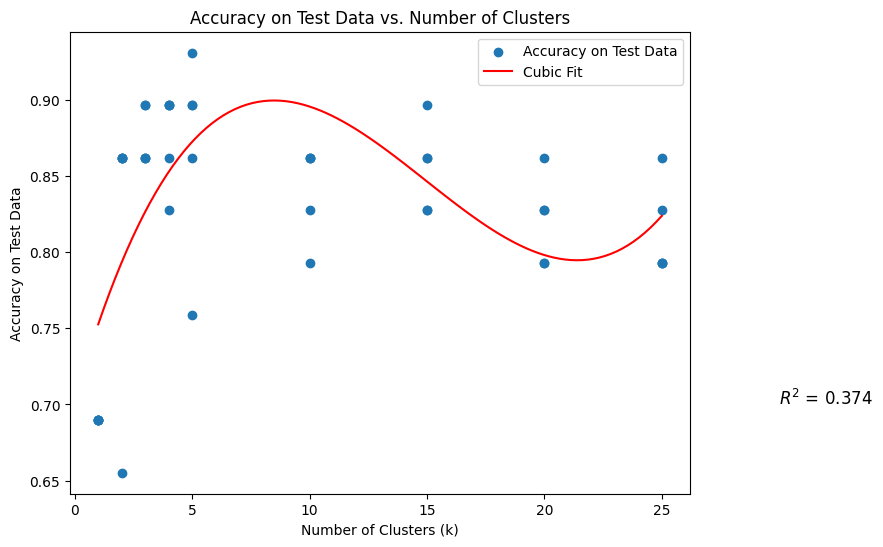

In [ ]:
k=3
# cluster and plot according to specifications above
results_df , expression_df = get_cluster_gse_data_w_norm("GSE10245", k)
test_df, expression_df, accuracy_all, accuracy_train, accuracy_test = train_and_test_kmeans(k, expression_df.copy(), results_df.copy())
plot_pca_test_clusters(k, test_df, expression_df)


accuracy_k_scatter_plot(expression_df.copy(), results_df.copy())



